# Capstone Project: Winner Winner Chickie Dinner?
<font size="4">Winner Prediction for Fortnite</font>

---

## Table of Contents

### [Problem Statement Recap](#ProbState)

### [Part 2: Data Cleaning and EDA](#Part2)
1. [**Imports (All imported libraries are added here)**](#imports)
2. [**Datasets**](#datasets)    
3. [**Match Stats Data Cleaning**](#matchdc)
4. [**Player Stats Data Cleaning**](#playerdc)    
    4.1 [**Feature Engineering**](#feateng)
5. [**Merger of Match Stats and Player Stats**](#merger)
6. [**EDA**](#eda)
7. [**Visualizations for predictor variables**](#visuals)
8. [**Progress thus far**](#progress)

---

<a id='ProbState'></a>
## Problem Statement Recap

For a recap, this project will be tackling the winner prediction of the Battle Royale game, Fortnite, which ranks third on the top award-giving games. ([Source](https://www.esportsearnings.com/games)).

As a simplification of the project, the focus of winner prediction will be placed on only solo matches, where the winner is the person who survived until the end out of a maximum of 100 players in the match.

<a id="part2"></a>
## Part 2: Data Cleaning and EDA 
In this notebook, data cleaning will be performed on the two datasets and then merged into a single dataframe for modelling. Exploratory Data Analysis is also conducted to understand the distribution of variables and discover any relationships. 

<a id="imports"></a>
### 1. Imports (All imported libraries are added here)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)

<a id="datasets"></a>
### 2. Datasets

In [2]:
# Reading in the datasets
match_stats = pd.read_csv('../datasets/matches_stats_solo.csv')
player_stats = pd.read_csv('../datasets/players_stats.csv')

In [3]:
# Define function to view basic information of dataframe
def df_look(df):
    print('Number of rows: ', df.shape[0])
    print('Number of columns: ', df.shape[1], '\n') 
    display(df.dtypes)
    print('\nMissing values in dataset:')
    display(df.isnull().sum())
    print('\nCount of duplicated rows in dataset: ', df[df.duplicated(keep=False)].shape[0], '\n')

<a id="matchdc"></a>
### 3. Match Stats Data Cleaning

In [4]:
# Checking the basic info for the match dataset
df_look(match_stats)

Number of rows:  69585
Number of columns:  14 



eliminations     float64
endTime           object
eventId            int64
geoIdentities     object
insertTime        object
placement          int64
points           float64
sessionId         object
teamId            object
teamNames         object
tiebreaker         int64
timeAlive        float64
solos              int64
names             object
dtype: object


Missing values in dataset:


eliminations     162
endTime            0
eventId            0
geoIdentities      0
insertTime         0
placement          0
points             0
sessionId          0
teamId             0
teamNames          0
tiebreaker         0
timeAlive        162
solos              0
names              0
dtype: int64


Count of duplicated rows in dataset:  0 



In [5]:
# Check the first 5 rows 
display(match_stats.head())

,eliminations,endTime,eventId,geoIdentities,insertTime,placement,points,sessionId,teamId,teamNames,tiebreaker,timeAlive,solos,names
0,8.0,2022-01-15T11:35:48.235,12817,['england'],2022-01-15T11:36:12.296637,1,46.0,2f5edf4c-f77e-4d62-a1a5-96097527fc7c,96d55701-6144-43f2-9fa3-550cba132dd3,{'c9c18cfb-0be2-495b-b794-234c2dd940eb': 'Kaid...,99,1462.0,1,Kaidon マ
1,3.0,2022-01-15T11:35:48.234,12817,['unitedkingdom'],2022-01-15T11:36:12.296637,2,31.0,2f5edf4c-f77e-4d62-a1a5-96097527fc7c,217547a6-0b4c-4099-8b17-ac3aa3359141,{'9d4c60a9-2912-414b-8205-7ba617c4e3bf': 'Twit...,98,1466.0,1,Twitter ziggzq
2,3.0,2022-01-15T11:35:44.76,12817,['ireland'],2022-01-15T11:36:02.683464,3,28.0,2f5edf4c-f77e-4d62-a1a5-96097527fc7c,5088989f-43a9-4bb1-b3c5-adb77859e8a9,{'41af47c3-c3a2-42a2-89ad-638c99bb611d': 'john...,97,1463.0,1,johnmonahan06
3,2.0,2022-01-15T11:35:37.444,12817,['france'],2022-01-15T11:36:02.683464,4,24.0,2f5edf4c-f77e-4d62-a1a5-96097527fc7c,8a91036f-ff9e-4857-b7eb-605c67873e21,{'bbb0028d-327c-47d1-ba1f-526f0c2ba72b': 'imMTS'},96,1458.0,1,imMTS
4,4.0,2022-01-15T11:35:32.7,12817,['netherlands'],2022-01-15T11:36:02.683464,5,27.0,2f5edf4c-f77e-4d62-a1a5-96097527fc7c,6298053b-4118-4ab2-a010-0b533a1eaaa9,{'97c9de42-dd89-4697-a40f-7830fbe57faf': 'RQS ...,95,1440.0,1,RQS Jxrno


In [6]:
# Checking out the rows with missing values
match_stats[match_stats.isna().any(axis=1)]

,eliminations,endTime,eventId,geoIdentities,insertTime,placement,points,sessionId,teamId,teamNames,tiebreaker,timeAlive,solos,names
40983,NaN,2021-08-21T10:24:54.966,10995,['japan'],2021-08-21T10:27:27.920979,1,15.0,620a1d91-b70e-436f-a14c-02480add6adc,01ac33d2-d161-4f8a-abb8-3484079ef51c,{'d53cfdfb-cafb-4efe-b429-68aba10c6754': 'SR.ス...,32,NaN,1,SR.スイッチ勢最強ひろ
40984,NaN,2021-08-21T10:24:54.967,10995,['japan'],2021-08-21T10:29:58.86292,1,15.0,620a1d91-b70e-436f-a14c-02480add6adc,1efa67e9-7e8c-459c-bdac-06be338f0dab,{'9da3abb5-3a7e-4c5e-9144-b888819284ef': 'xxx紅...,32,NaN,1,xxx紅茶花伝xxx
40985,NaN,2021-08-21T10:24:54.966,10995,['japan'],2021-08-21T10:27:43.296765,1,15.0,620a1d91-b70e-436f-a14c-02480add6adc,3a0dec8b-0e5f-48bc-8e72-4d19b432423e,{'9a5a2346-2c96-445e-a98d-cffd6be315b8': 'Zayn...,32,NaN,1,Zayne0606
40986,NaN,2021-08-21T10:24:54.966,10995,[],2021-08-21T10:27:30.078708,1,15.0,620a1d91-b70e-436f-a14c-02480add6adc,5b671d26-6baa-4c6e-bb34-19c3f8b42c9d,{'27956acf-809d-4007-8ead-352ea29b548c': '俺は雑魚...,32,NaN,1,俺は雑魚僕は天才
40987,NaN,2021-08-21T10:24:54.966,10995,['russia'],2021-08-21T10:29:57.816723,1,15.0,620a1d91-b70e-436f-a14c-02480add6adc,5d7e2e2a-3ac1-4b48-9f85-ab367ae6070c,{'b607b260-52be-4399-a375-e203d8a4c7d8': 'RyZe...,32,NaN,1,RyZe_pablito
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41140,NaN,2021-08-21T11:40:42.771,10995,['russia'],2021-08-21T11:46:05.760595,1,15.0,7b52dd11-6703-4f1e-8bdf-139406c382a4,acdcc9cb-19df-448c-b3fa-02776832bef8,{'cb85872a-353e-4f80-8272-72441152b555': 'Alla...,32,NaN,1,Allan on 60fps
41141,NaN,2021-08-21T11:40:42.77,10995,['japan'],2021-08-21T11:41:29.754411,1,15.0,7b52dd11-6703-4f1e-8bdf-139406c382a4,bba61d40-63d2-43fc-864d-2fdad1b9bd57,{'367cf6a4-f35d-4db9-bf1b-041168abe03e': 'LUNE...,32,NaN,1,LUNER りり
41142,NaN,2021-08-21T11:40:42.77,10995,['japan'],2021-08-21T11:41:29.754411,1,15.0,7b52dd11-6703-4f1e-8bdf-139406c382a4,c194dbc2-4f0b-4f84-b839-85b7bb5e35de,{'c7abbe78-a1e7-4ee8-95f9-0563709a27f5': '타츠야니다'},32,NaN,1,타츠야니다
41143,NaN,2021-08-21T11:40:42.769,10995,[],2021-08-21T11:43:57.597068,1,15.0,7b52dd11-6703-4f1e-8bdf-139406c382a4,d6ca69da-4766-49d7-a177-0fcb307d1f36,{'dceecd2d-0c88-4e83-a315-d1877846e52a': 'KYOG...,32,NaN,1,KYOGOKU SIN


A quick look at the rows with missing values for `timeAlive` and `eliminations` reveal that these data are faulty and thus meaningless. As such, these rows will be removed from the dataframe.

In [7]:
# Making a copy of the match dataframe
match_df = match_stats.copy()

# Dropping all of the rows with missing values
match_df.dropna(inplace = True)

# Checking the shape of the dataframe
match_df.shape

(69423, 14)

Considering all columns of the dataframe, the following columns will be dropped:
- `endTime` - The time at which the player dies in the match, or in the case of the winner, the time when the match ends
- `insertTime` - The time at which the player enters the map in the match   
- `geoIdentities` - The country or region the player comes from 
- `teamId` - The ID used to identify the team for the match
- `teamNames` - A dictionary used to map the names and account IDs of the players for the match
- `eventId` - The ID used to identify the tournament from which the match is from
- `tiebreaker` - Tiebreaker statistic to help determine the placement
- `solos` - A tag created to identify solo matches

For the first two columns, as the `timeAlive` column is derived from these two columns, we will be dropping these for reduction in multicollinearity. The next three columns are to identify the player, and since we already have the `name` column, they will not be needed here. The `eventId` is also not necessary since we already have the `sessionId` to identify the match. The `tiebreaker` and `placement` columns are also dropped since they are directly related to the `placement` column which is our target column. And lastly, the `solos` column is a tag created before to identify solo matches. Since all the matches here are solo matches, this column will also not be required.

In [8]:
# Dropping the columns listed above
match_df.drop(columns = ['endTime', 'insertTime', 'geoIdentities', 'teamId', 'teamNames', 'eventId',
                         'tiebreaker', 'solos'], inplace = True)

In [9]:
# Creating Target column based on placement
match_df['Target'] = (match_df['placement'] == 1).astype(int)

# Dropping the placement column 
match_df.drop(columns = ['placement'], inplace = True)

# Checking the first 5 rows again
match_df.head()

,eliminations,points,sessionId,timeAlive,names,Target
0,8.0,46.0,2f5edf4c-f77e-4d62-a1a5-96097527fc7c,1462.0,Kaidon マ,1
1,3.0,31.0,2f5edf4c-f77e-4d62-a1a5-96097527fc7c,1466.0,Twitter ziggzq,0
2,3.0,28.0,2f5edf4c-f77e-4d62-a1a5-96097527fc7c,1463.0,johnmonahan06,0
3,2.0,24.0,2f5edf4c-f77e-4d62-a1a5-96097527fc7c,1458.0,imMTS,0
4,4.0,27.0,2f5edf4c-f77e-4d62-a1a5-96097527fc7c,1440.0,RQS Jxrno,0


In [10]:
# Rename the column names to name in order to map the columns properly
match_df.rename(columns = {'names': 'name'}, inplace = True)

# Rename all the columns to remove spaces and change to lowercase
match_df.columns = match_df.columns.str.lower().str.replace(' ', '')

# Check the first 5 rows again
match_df.head()

,eliminations,points,sessionid,timealive,name,target
0,8.0,46.0,2f5edf4c-f77e-4d62-a1a5-96097527fc7c,1462.0,Kaidon マ,1
1,3.0,31.0,2f5edf4c-f77e-4d62-a1a5-96097527fc7c,1466.0,Twitter ziggzq,0
2,3.0,28.0,2f5edf4c-f77e-4d62-a1a5-96097527fc7c,1463.0,johnmonahan06,0
3,2.0,24.0,2f5edf4c-f77e-4d62-a1a5-96097527fc7c,1458.0,imMTS,0
4,4.0,27.0,2f5edf4c-f77e-4d62-a1a5-96097527fc7c,1440.0,RQS Jxrno,0


<a id="playerdc"></a>
### 4. Player Stats Data Cleaning

In [11]:
# Checking the basic info for the match dataset
df_look(player_stats)

Number of rows:  33502
Number of columns:  90 



name                        object
accountId                   object
lifetime_Top 5s            float64
lifetime_Top 3s            float64
lifetime_Top 6s            float64
lifetime_Top 10            float64
lifetime_Top 12s           float64
lifetime_Top 25s           float64
lifetime_Score              object
lifetime_Matches Played    float64
lifetime_Wins              float64
lifetime_Win%               object
lifetime_Kills             float64
lifetime_K/d               float64
solo_score                 float64
solo_top1                  float64
solo_top3                  float64
solo_top5                  float64
solo_top6                  float64
solo_top10                 float64
solo_top12                 float64
solo_top25                 float64
solo_kd                    float64
solo_winRatio              float64
solo_matches               float64
solo_kills                 float64
solo_minutesPlayed         float64
solo_kpm                   float64
solo_kpg            


Missing values in dataset:


name                           0
accountId                   7467
lifetime_Top 5s             7467
lifetime_Top 3s             7467
lifetime_Top 6s             7467
lifetime_Top 10             7467
lifetime_Top 12s            7467
lifetime_Top 25s            7467
lifetime_Score              7467
lifetime_Matches Played     7467
lifetime_Wins               7467
lifetime_Win%               7467
lifetime_Kills              7467
lifetime_K/d                7467
solo_score                  7467
solo_top1                   7467
solo_top3                   7467
solo_top5                   7467
solo_top6                   7467
solo_top10                  7467
solo_top12                  7467
solo_top25                  7467
solo_kd                     7467
solo_winRatio               7467
solo_matches                7467
solo_kills                  7467
solo_minutesPlayed          7467
solo_kpm                    7467
solo_kpg                    7467
solo_avgTimePlayed          7467
solo_score


Count of duplicated rows in dataset:  0 



In [12]:
# Check the first 5 rows 
display(player_stats.head())

,name,accountId,lifetime_Top 5s,lifetime_Top 3s,lifetime_Top 6s,lifetime_Top 10,lifetime_Top 12s,lifetime_Top 25s,lifetime_Score,lifetime_Matches Played,lifetime_Wins,lifetime_Win%,lifetime_Kills,lifetime_K/d,solo_score,solo_top1,solo_top3,solo_top5,solo_top6,solo_top10,solo_top12,solo_top25,solo_kd,solo_winRatio,solo_matches,solo_kills,solo_minutesPlayed,solo_kpm,solo_kpg,solo_avgTimePlayed,solo_scorePerMatch,solo_scorePerMin,duos_score,duos_top1,duos_top3,duos_top5,duos_top6,duos_top10,duos_top12,duos_top25,duos_kd,duos_winRatio,duos_matches,duos_kills,duos_minutesPlayed,duos_kpm,duos_kpg,duos_avgTimePlayed,duos_scorePerMatch,duos_scorePerMin,squads_score,squads_top1,squads_top3,squads_top5,squads_top6,squads_top10,squads_top12,squads_top25,squads_kd,squads_winRatio,squads_matches,squads_kills,squads_minutesPlayed,squads_kpm,squads_kpg,squads_avgTimePlayed,squads_scorePerMatch,squads_scorePerMin,trios_score,trios_top1,trios_top3,trios_top5,trios_top6,trios_top10,trios_top12,trios_top25,trios_kd,trios_winRatio,trios_matches,trios_kills,trios_minutesPlayed,trios_kpm,trios_kpg,trios_avgTimePlayed,trios_scorePerMatch,trios_scorePerMin,solo_trnRating,duos_trnRating,trios_trnRating,squads_trnRating
0,Tattarou 67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Phonixell 7,41d6a5bd-1fd4-449f-bb39-006b76c55a7d,232.0,294.0,475.0,116.0,459.0,270.0,"972,615",4627.0,288.0,6%,10261.0,2.36,192685.0,28.0,0.0,0.0,0.0,116.0,0.0,270.0,1.86,2.5,1112.0,2014.0,7928.0,0.25,1.81,427.77,173.28,24.30,333705.0,81.0,0.0,232.0,0.0,0.0,459.0,0.0,2.41,4.9,1644.0,3763.0,12768.0,0.29,2.29,465.99,202.98,26.14,8442.0,3.0,4.0,0.0,8.0,0.0,0.0,0.0,2.29,5.1,59.0,128.0,318.0,0.40,2.17,323.39,143.08,26.55,437783.0,176.0,290.0,0.0,467.0,0.0,0.0,0.0,2.66,9.7,1812.0,4356.0,18127.0,0.24,2.40,600.23,241.60,24.15,NaN,NaN,NaN,NaN
2,Θbito,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,jоhnny.,fc2c5d17-675a-4b1b-ab1a-591ed9fd0752,555.0,529.0,1007.0,424.0,1232.0,917.0,"2,370,020",13786.0,474.0,3%,14615.0,1.10,531061.0,62.0,0.0,0.0,0.0,424.0,0.0,917.0,1.06,2.1,2926.0,3028.0,25473.0,0.12,1.03,522.34,181.50,20.85,916108.0,196.0,0.0,555.0,0.0,0.0,1232.0,0.0,1.21,3.5,5639.0,6594.0,40146.0,0.16,1.17,427.16,162.46,22.82,322541.0,44.0,166.0,0.0,367.0,0.0,0.0,0.0,0.59,1.8,2383.0,1386.0,15898.0,0.09,0.58,400.29,135.35,20.29,600310.0,172.0,363.0,0.0,640.0,0.0,0.0,0.0,1.35,6.1,2838.0,3607.0,27600.0,0.13,1.27,583.51,211.53,21.75,NaN,NaN,NaN,NaN
4,KingAMGB,f968efab-9f76-471c-9cb5-82531844b813,838.0,377.0,642.0,279.0,1518.0,523.0,"1,487,972",6773.0,375.0,6%,10956.0,1.71,248211.0,23.0,0.0,0.0,0.0,279.0,0.0,523.0,1.03,1.7,1322.0,1341.0,11041.0,0.12,1.01,501.10,187.75,22.48,814852.0,213.0,0.0,838.0,0.0,0.0,1518.0,0.0,1.85,6.0,3570.0,6212.0,34535.0,0.18,1.74,580.42,228.25,23.59,342154.0,126.0,327.0,0.0,537.0,0.0,0.0,0.0,2.29,8.8,1427.0,2979.0,13978.0,0.21,2.09,587.72,239.77,24.48,82755.0,13.0,50.0,0.0,105.0,0.0,0.0,0.0,0.96,2.9,454.0,424.0,4159.0,0.10,0.93,549.65,182.28,19.90,NaN,NaN,NaN,NaN


In [13]:
# listing all of the columns in the dataframe
player_stats.columns

Index(['name', 'accountId', 'lifetime_Top 5s', 'lifetime_Top 3s',
       'lifetime_Top 6s', 'lifetime_Top 10', 'lifetime_Top 12s',
       'lifetime_Top 25s', 'lifetime_Score', 'lifetime_Matches Played',
       'lifetime_Wins', 'lifetime_Win%', 'lifetime_Kills', 'lifetime_K/d',
       'solo_score', 'solo_top1', 'solo_top3', 'solo_top5', 'solo_top6',
       'solo_top10', 'solo_top12', 'solo_top25', 'solo_kd', 'solo_winRatio',
       'solo_matches', 'solo_kills', 'solo_minutesPlayed', 'solo_kpm',
       'solo_kpg', 'solo_avgTimePlayed', 'solo_scorePerMatch',
       'solo_scorePerMin', 'duos_score', 'duos_top1', 'duos_top3', 'duos_top5',
       'duos_top6', 'duos_top10', 'duos_top12', 'duos_top25', 'duos_kd',
       'duos_winRatio', 'duos_matches', 'duos_kills', 'duos_minutesPlayed',
       'duos_kpm', 'duos_kpg', 'duos_avgTimePlayed', 'duos_scorePerMatch',
       'duos_scorePerMin', 'squads_score', 'squads_top1', 'squads_top3',
       'squads_top5', 'squads_top6', 'squads_top10', 'squads_

Looking at the number of columns above, and the missing values in the dataset, we will start by reducing the number of columns and rows in the dataset.

Since the majority of the values for the four columns `solo_trnRating`, `duos_trnRating`, `trios_trnRating`, `squads_trnRating` are missing, we will dropping these four columns.

And as for the other columns, the missing values are at the total of 7467, which suggests that there are these amount of rows with empty data other than the name. As such, we will be dropping these rows as well.

In [14]:
# Making a copy of the match dataframe
player_df = player_stats.copy()

# Dropping the four Rating columns
player_df.drop(columns = ['solo_trnRating', 'duos_trnRating', 'trios_trnRating', 'squads_trnRating'], inplace = True)

# Dropping all of the rows with missing values
player_df.dropna(inplace = True)

# Checking the shape of the dataframe
display(player_df.shape)

# Checking the first 5 rows again
player_df.head()

(26035, 86)

,name,accountId,lifetime_Top 5s,lifetime_Top 3s,lifetime_Top 6s,lifetime_Top 10,lifetime_Top 12s,lifetime_Top 25s,lifetime_Score,lifetime_Matches Played,lifetime_Wins,lifetime_Win%,lifetime_Kills,lifetime_K/d,solo_score,solo_top1,solo_top3,solo_top5,solo_top6,solo_top10,solo_top12,solo_top25,solo_kd,solo_winRatio,solo_matches,solo_kills,solo_minutesPlayed,solo_kpm,solo_kpg,solo_avgTimePlayed,solo_scorePerMatch,solo_scorePerMin,duos_score,duos_top1,duos_top3,duos_top5,duos_top6,duos_top10,duos_top12,duos_top25,duos_kd,duos_winRatio,duos_matches,duos_kills,duos_minutesPlayed,duos_kpm,duos_kpg,duos_avgTimePlayed,duos_scorePerMatch,duos_scorePerMin,squads_score,squads_top1,squads_top3,squads_top5,squads_top6,squads_top10,squads_top12,squads_top25,squads_kd,squads_winRatio,squads_matches,squads_kills,squads_minutesPlayed,squads_kpm,squads_kpg,squads_avgTimePlayed,squads_scorePerMatch,squads_scorePerMin,trios_score,trios_top1,trios_top3,trios_top5,trios_top6,trios_top10,trios_top12,trios_top25,trios_kd,trios_winRatio,trios_matches,trios_kills,trios_minutesPlayed,trios_kpm,trios_kpg,trios_avgTimePlayed,trios_scorePerMatch,trios_scorePerMin
1,Phonixell 7,41d6a5bd-1fd4-449f-bb39-006b76c55a7d,232.0,294.0,475.0,116.0,459.0,270.0,"972,615",4627.0,288.0,6%,10261.0,2.36,192685.0,28.0,0.0,0.0,0.0,116.0,0.0,270.0,1.86,2.5,1112.0,2014.0,7928.0,0.25,1.81,427.77,173.28,24.30,333705.0,81.0,0.0,232.0,0.0,0.0,459.0,0.0,2.41,4.9,1644.0,3763.0,12768.0,0.29,2.29,465.99,202.98,26.14,8442.0,3.0,4.0,0.0,8.0,0.0,0.0,0.0,2.29,5.1,59.0,128.0,318.0,0.40,2.17,323.39,143.08,26.55,437783.0,176.0,290.0,0.0,467.0,0.0,0.0,0.0,2.66,9.7,1812.0,4356.0,18127.0,0.24,2.40,600.23,241.60,24.15
3,jоhnny.,fc2c5d17-675a-4b1b-ab1a-591ed9fd0752,555.0,529.0,1007.0,424.0,1232.0,917.0,"2,370,020",13786.0,474.0,3%,14615.0,1.10,531061.0,62.0,0.0,0.0,0.0,424.0,0.0,917.0,1.06,2.1,2926.0,3028.0,25473.0,0.12,1.03,522.34,181.50,20.85,916108.0,196.0,0.0,555.0,0.0,0.0,1232.0,0.0,1.21,3.5,5639.0,6594.0,40146.0,0.16,1.17,427.16,162.46,22.82,322541.0,44.0,166.0,0.0,367.0,0.0,0.0,0.0,0.59,1.8,2383.0,1386.0,15898.0,0.09,0.58,400.29,135.35,20.29,600310.0,172.0,363.0,0.0,640.0,0.0,0.0,0.0,1.35,6.1,2838.0,3607.0,27600.0,0.13,1.27,583.51,211.53,21.75
4,KingAMGB,f968efab-9f76-471c-9cb5-82531844b813,838.0,377.0,642.0,279.0,1518.0,523.0,"1,487,972",6773.0,375.0,6%,10956.0,1.71,248211.0,23.0,0.0,0.0,0.0,279.0,0.0,523.0,1.03,1.7,1322.0,1341.0,11041.0,0.12,1.01,501.10,187.75,22.48,814852.0,213.0,0.0,838.0,0.0,0.0,1518.0,0.0,1.85,6.0,3570.0,6212.0,34535.0,0.18,1.74,580.42,228.25,23.59,342154.0,126.0,327.0,0.0,537.0,0.0,0.0,0.0,2.29,8.8,1427.0,2979.0,13978.0,0.21,2.09,587.72,239.77,24.48,82755.0,13.0,50.0,0.0,105.0,0.0,0.0,0.0,0.96,2.9,454.0,424.0,4159.0,0.10,0.93,549.65,182.28,19.90
5,Naif7.,fd75fee2-9f82-4f61-9fdc-134618b7aeb9,482.0,681.0,1101.0,511.0,895.0,969.0,"2,094,564",10926.0,607.0,6%,20760.0,2.01,609757.0,127.0,0.0,0.0,0.0,511.0,0.0,969.0,1.73,3.6,3515.0,5864.0,23774.0,0.25,1.67,405.82,173.47,25.65,612482.0,181.0,0.0,482.0,0.0,0.0,895.0,0.0,2.16,5.7,3155.0,6431.0,23112.0,0.28,2.04,439.53,194.13,26.50,431774.0,170.0,399.0,0.0,624.0,0.0,0.0,0.0,2.37,7.8,2166.0,4723.0,16131.0,0.29,2.18,446.84,199.34,26.77,440551.0,129.0,282.0,0.0,477.0,0.0,0.0,0.0,1.91,6.2,2090.0,3742.0,19888.0,0.19,1.79,570.95,210.79,22.15
7,Tiagoж,7683bc72-173f-4cd7-835d-8668367f4c4d,443.0,289.0,561.0,757.0,1091.0,1774.0,"1,818,937",14628.0,310.0,2%,15259.0,1.07,834777.0,102.0,0.0,0.0,0.0,757.0,0.0,1774.0,1.03,1.5,6996.0,7133.0,35323.0,0.20,1.02,302.94,119.32,23.63,565132.0,103.0,0.0,443.0,0.0,0.0,1091.0,0.0,1.04,2.3,4454.0,4508.0,24619.0,0.18,1.01,331.64,126.88,22.96,256805.0,71.0,199.0,0.0,385.0,0.0,0.0,0.0,1.12,3.1,2287.0,2480.0,9807.0,0.25,1.08,257.29,112.29,26.19,162223.0,34.0,90.0,0.0,176.0,0.0,0.0,0.0,1.33,3.8,891.0,1138.0,7337.0,0.16,1.28,494.07,182.07,22.11


There are also columns with all zero values instead of null values like above. In these cases, these columns are meaningless as they are created as part of the statistics frame for the players and are not used in any capacity. As such these columns also be dropped.

In [15]:
# Finding columns with all 0 values
zero_col = list(player_df.columns[(player_df == 0).all()])
zero_col

['solo_top3',
 'solo_top5',
 'solo_top6',
 'solo_top12',
 'duos_top3',
 'duos_top6',
 'duos_top10',
 'duos_top25',
 'squads_top5',
 'squads_top10',
 'squads_top12',
 'squads_top25',
 'trios_top5',
 'trios_top10',
 'trios_top12',
 'trios_top25']

In [16]:
# Dropping the above columns
player_df.drop(columns = zero_col, inplace = True)

# Checking the shape of the dataframe again
player_df.shape

(26035, 70)

It should be noted that `lifetime_Score` and `lifetime_Win%` are listed as objects. Since they are calculated from other columns, we can define them directly.

In [17]:
# Redefining lifetime_Score
player_df['lifetime_Score'] = (player_df['solo_score'] + player_df['duos_score']
                               + player_df['squads_score'] + player_df['trios_score']).astype(float)

# Redefining lifetime_Win% 
player_df['lifetime_Win%'] = (player_df['lifetime_Wins'] / player_df['lifetime_Matches Played']).astype(float)

# Checking the dtypes again
player_df.dtypes

name                        object
accountId                   object
lifetime_Top 5s            float64
lifetime_Top 3s            float64
lifetime_Top 6s            float64
lifetime_Top 10            float64
lifetime_Top 12s           float64
lifetime_Top 25s           float64
lifetime_Score             float64
lifetime_Matches Played    float64
lifetime_Wins              float64
lifetime_Win%              float64
lifetime_Kills             float64
lifetime_K/d               float64
solo_score                 float64
solo_top1                  float64
solo_top10                 float64
solo_top25                 float64
solo_kd                    float64
solo_winRatio              float64
solo_matches               float64
solo_kills                 float64
solo_minutesPlayed         float64
solo_kpm                   float64
solo_kpg                   float64
solo_avgTimePlayed         float64
solo_scorePerMatch         float64
solo_scorePerMin           float64
duos_score          

At first glance, there seem to be columns with duplicated values. As such, there is a need to identify them.

In [18]:
# Showing the duplicated columns
player_df.T[player_df.T.duplicated(keep=False)]

,1,3,4,5,7,8,9,10,11,12,13,15,16,19,22,24,26,27,28,29,31,32,33,34,35,36,37,38,40,41,43,44,45,46,47,48,49,51,54,55,57,58,59,60,62,63,64,65,66,67,...,33430,33431,33432,33433,33434,33435,33437,33438,33439,33440,33441,33443,33444,33445,33446,33447,33448,33449,33452,33453,33454,33455,33456,33457,33458,33459,33460,33462,33463,33464,33469,33470,33471,33473,33474,33475,33476,33478,33479,33481,33482,33483,33484,33486,33487,33493,33496,33497,33499,33500
lifetime_Top 5s,232.0,555.0,838.0,482.0,443.0,188.0,664.0,206.0,348.0,346.0,426.0,627.0,243.0,1749.0,503.0,32.0,303.0,613.0,673.0,161.0,45.0,182.0,119.0,338.0,765.0,1218.0,1318.0,801.0,618.0,489.0,388.0,597.0,1348.0,289.0,57.0,325.0,859.0,345.0,180.0,215.0,94.0,278.0,178.0,267.0,93.0,274.0,918.0,532.0,504.0,91.0,...,1129.0,482.0,308.0,136.0,1329.0,624.0,544.0,39.0,589.0,128.0,385.0,539.0,256.0,755.0,626.0,1132.0,744.0,714.0,60.0,620.0,493.0,227.0,232.0,70.0,886.0,680.0,8.0,500.0,393.0,1031.0,307.0,614.0,232.0,384.0,136.0,318.0,188.0,374.0,538.0,908.0,552.0,496.0,620.0,705.0,827.0,133.0,726.0,1313.0,677.0,542.0
lifetime_Top 10,116.0,424.0,279.0,511.0,757.0,37.0,821.0,359.0,269.0,604.0,651.0,857.0,880.0,645.0,480.0,185.0,439.0,649.0,443.0,587.0,297.0,290.0,348.0,180.0,339.0,1278.0,936.0,453.0,654.0,329.0,223.0,875.0,1844.0,560.0,36.0,446.0,391.0,277.0,598.0,53.0,394.0,413.0,283.0,369.0,64.0,150.0,1378.0,325.0,308.0,105.0,...,1100.0,1349.0,299.0,235.0,2946.0,634.0,386.0,29.0,1174.0,197.0,1323.0,1105.0,73.0,1061.0,1052.0,447.0,895.0,714.0,63.0,311.0,178.0,407.0,257.0,124.0,737.0,308.0,106.0,645.0,483.0,926.0,191.0,457.0,543.0,236.0,73.0,189.0,114.0,691.0,500.0,921.0,593.0,222.0,582.0,682.0,1330.0,43.0,443.0,1422.0,628.0,341.0
lifetime_Top 12s,459.0,1232.0,1518.0,895.0,1091.0,306.0,1356.0,387.0,731.0,787.0,963.0,1437.0,629.0,2778.0,979.0,88.0,706.0,1228.0,1349.0,303.0,97.0,324.0,222.0,766.0,1296.0,2137.0,2431.0,1451.0,1201.0,1118.0,764.0,1276.0,2375.0,571.0,82.0,651.0,1977.0,709.0,396.0,495.0,192.0,577.0,382.0,434.0,184.0,609.0,1860.0,1047.0,1067.0,191.0,...,1992.0,1059.0,651.0,252.0,1966.0,1308.0,1191.0,84.0,1096.0,218.0,731.0,1108.0,486.0,1480.0,1468.0,1966.0,1848.0,1359.0,114.0,1187.0,972.0,482.0,508.0,113.0,1833.0,1225.0,26.0,820.0,988.0,1819.0,584.0,1117.0,444.0,682.0,377.0,649.0,406.0,892.0,1189.0,1569.0,1056.0,1025.0,1247.0,1425.0,1619.0,255.0,1282.0,2631.0,1461.0,1012.0
lifetime_Top 25s,270.0,917.0,523.0,969.0,1774.0,80.0,1605.0,699.0,615.0,1573.0,1550.0,2029.0,2196.0,1036.0,1132.0,422.0,1096.0,1226.0,1209.0,1013.0,524.0,498.0,635.0,407.0,528.0,2295.0,1810.0,909.0,1422.0,945.0,422.0,2260.0,3439.0,1203.0,55.0,1086.0,964.0,785.0,1656.0,159.0,939.0,976.0,791.0,686.0,152.0,391.0,3106.0,668.0,638.0,206.0,...,2139.0,3102.0,646.0,377.0,4285.0,1501.0,911.0,70.0,2300.0,392.0,2353.0,2330.0,145.0,2456.0,2618.0,870.0,2099.0,1496.0,157.0,660.0,374.0,981.0,521.0,227.0,1617.0,624.0,266.0,1285.0,1177.0,1940.0,389.0,911.0,1247.0,403.0,232.0,400.0,295.0,1823.0,1303.0,1602.0,1139.0,471.0,1346.0,1414.0,2723.0,99.0,854.0,3007.0,1362.0,727.0
solo_top10,116.0,424.0,279.0,511.0,757.0,37.0,821.0,359.0,269.0,604.0,651.0,857.0,880.0,645.0,480.0,185.0,439.0,649.0,443.0,587.0,297.0,290.0,348.0,180.0,339.0,1278.0,936.0,453.0,654.0,329.0,223.0,875.0,1844.0,560.0,36.0,446.0,391.0,277.0,598.0,53.0,394.0,413.0,283.0,369.0,64.0,150.0,1378.0,325.0,308.0,105.0,...,1100.0,1349.0,299.0,235.0,2946.0,634.0,386.0,29.0,1174.0,197.0,1323.0,1105.0,73.0,1061.0,1052.0,447.0,895.0,714.0,63.0,311.0,178.0,407.0,257.0,124.0,737.0,308.0,106.0,645.0,483.0,926.0,191.0,457.0,543.0,236.0,73.0,189.0,114.0,691.0,500.0,921.0,593.0,222.0,582.0,682.0,1330.0,43.0,443.0,1422.0,628.0,341.0
solo_top25,270.0,917.0,523.0,969.0,1774.0,80.0,1605.0,699.0,615.0,1573.0,1550.0,2029.0,2196.0,1036.0,1132.0,422.0,1096.0,1226.0,1209.0,1013.0,524.0,498.0,635.0,407.0,528.0,2295.0,1810.0,909.0,1422.0,945.0,422.0,2260.0,3439.0,1203.0,55.0,1086.0,964.0,785.0,1656.0,159.0,939.0,976.0,791.0,686.0,152.0,391.0,3106.0,668.0,638.0,206.0,...,2139.0,3102.0,646.0,377.0,4285

From here, we can see that it is the `lifetime_Top` features that are mostly getting duplicated. As such, since these columns are obtained from the individual sections, we will be converting these columns into features that are more useful for interpretations in the feature engineering below.

In [19]:
# Rename all the columns to remove spaces and change to lowercase
player_df.columns = player_df.columns.str.lower().str.replace(' ', '')

# Check the columns
player_df.columns

Index(['name', 'accountid', 'lifetime_top5s', 'lifetime_top3s',
       'lifetime_top6s', 'lifetime_top10', 'lifetime_top12s',
       'lifetime_top25s', 'lifetime_score', 'lifetime_matchesplayed',
       'lifetime_wins', 'lifetime_win%', 'lifetime_kills', 'lifetime_k/d',
       'solo_score', 'solo_top1', 'solo_top10', 'solo_top25', 'solo_kd',
       'solo_winratio', 'solo_matches', 'solo_kills', 'solo_minutesplayed',
       'solo_kpm', 'solo_kpg', 'solo_avgtimeplayed', 'solo_scorepermatch',
       'solo_scorepermin', 'duos_score', 'duos_top1', 'duos_top5',
       'duos_top12', 'duos_kd', 'duos_winratio', 'duos_matches', 'duos_kills',
       'duos_minutesplayed', 'duos_kpm', 'duos_kpg', 'duos_avgtimeplayed',
       'duos_scorepermatch', 'duos_scorepermin', 'squads_score', 'squads_top1',
       'squads_top3', 'squads_top6', 'squads_kd', 'squads_winratio',
       'squads_matches', 'squads_kills', 'squads_minutesplayed', 'squads_kpm',
       'squads_kpg', 'squads_avgtimeplayed', 'squads_sco

<a id="feateng"></a>
#### 4.1 Feature Engineering

From above, we can see that there are quite a few feature columns available for the individual sections (`solo`, `duos`, ` squads`, `trios`) that is not available for the lifetime section. As such, it may be prudent to create these feature columns for the dataframe.

**4.1.1 Lifetime Top Statistics**    
From the individual sections, we can see three types of top statistics that are imported directly into the lifetime statistics, as such, it may be useful to directly translate them for the lifetime statistics for better interpretation.

|Section|Top 1st Rank|Top 2nd Rank|Top 3rd Rank|
|---|---|---|---|
|**solo**|top1|top10|top25|
|**duos**|top1|top5|top12|
|**squads**|top1|top3|top6|
|**trios**|top1|top3|top6|
|**lifetime**|wins|*top3/5/10*|*top6/12/25*|

The italicized features in the last row will be our new columns here.

In [20]:
# Creating the new lifetime_top statistics
player_df['lifetime_top3/5/10'] = (player_df['lifetime_top3s'] + player_df['lifetime_top5s'] 
                                   + player_df['lifetime_top10'])

player_df['lifetime_top6/12/25'] = (player_df['lifetime_top6s'] + player_df['lifetime_top12s'] 
                                    + player_df['lifetime_top25s'])

# Dropping these columns
player_df.drop(columns = ['lifetime_top3s', 'lifetime_top5s', 'lifetime_top10', 
                          'lifetime_top6s', 'lifetime_top12s', 'lifetime_top25s'], inplace = True)

**4.1.2 New Lifetime Statistics** 

In [21]:
# Creating minutesplayed column
player_df['lifetime_minutesplayed'] = (player_df['solo_minutesplayed'] + player_df['duos_minutesplayed'] 
                                      + player_df['squads_minutesplayed'] + player_df['trios_minutesplayed'])

# Creating the derivative columns 
player_df['lifetime_kpm'] = player_df['lifetime_kills'] / player_df['lifetime_minutesplayed']
player_df['lifetime_kpg'] = player_df['lifetime_kills'] / player_df['lifetime_matchesplayed']
player_df['lifetime_avgtimeplayed'] = player_df['lifetime_minutesplayed'] / player_df['lifetime_matchesplayed'] * 60
player_df['lifetime_scorepermatch'] = player_df['lifetime_score'] / player_df['lifetime_matchesplayed']
player_df['lifetime_scorepermin'] = player_df['lifetime_score'] / player_df['lifetime_minutesplayed']

# Checking the top 5 columns again
player_df.head()

,name,accountid,lifetime_score,lifetime_matchesplayed,lifetime_wins,lifetime_win%,lifetime_kills,lifetime_k/d,solo_score,solo_top1,solo_top10,solo_top25,solo_kd,solo_winratio,solo_matches,solo_kills,solo_minutesplayed,solo_kpm,solo_kpg,solo_avgtimeplayed,solo_scorepermatch,solo_scorepermin,duos_score,duos_top1,duos_top5,duos_top12,duos_kd,duos_winratio,duos_matches,duos_kills,duos_minutesplayed,duos_kpm,duos_kpg,duos_avgtimeplayed,duos_scorepermatch,duos_scorepermin,squads_score,squads_top1,squads_top3,squads_top6,squads_kd,squads_winratio,squads_matches,squads_kills,squads_minutesplayed,squads_kpm,squads_kpg,squads_avgtimeplayed,squads_scorepermatch,squads_scorepermin,trios_score,trios_top1,trios_top3,trios_top6,trios_kd,trios_winratio,trios_matches,trios_kills,trios_minutesplayed,trios_kpm,trios_kpg,trios_avgtimeplayed,trios_scorepermatch,trios_scorepermin,lifetime_top3/5/10,lifetime_top6/12/25,lifetime_minutesplayed,lifetime_kpm,lifetime_kpg,lifetime_avgtimeplayed,lifetime_scorepermatch,lifetime_scorepermin
1,Phonixell 7,41d6a5bd-1fd4-449f-bb39-006b76c55a7d,972615.0,4627.0,288.0,0.062243,10261.0,2.36,192685.0,28.0,116.0,270.0,1.86,2.5,1112.0,2014.0,7928.0,0.25,1.81,427.77,173.28,24.30,333705.0,81.0,232.0,459.0,2.41,4.9,1644.0,3763.0,12768.0,0.29,2.29,465.99,202.98,26.14,8442.0,3.0,4.0,8.0,2.29,5.1,59.0,128.0,318.0,0.40,2.17,323.39,143.08,26.55,437783.0,176.0,290.0,467.0,2.66,9.7,1812.0,4356.0,18127.0,0.24,2.40,600.23,241.60,24.15,642.0,1204.0,39141.0,0.262155,2.217636,507.555652,210.204236,24.849007
3,jоhnny.,fc2c5d17-675a-4b1b-ab1a-591ed9fd0752,2370020.0,13786.0,474.0,0.034383,14615.0,1.10,531061.0,62.0,424.0,917.0,1.06,2.1,2926.0,3028.0,25473.0,0.12,1.03,522.34,181.50,20.85,916108.0,196.0,555.0,1232.0,1.21,3.5,5639.0,6594.0,40146.0,0.16,1.17,427.16,162.46,22.82,322541.0,44.0,166.0,367.0,0.59,1.8,2383.0,1386.0,15898.0,0.09,0.58,400.29,135.35,20.29,600310.0,172.0,363.0,640.0,1.35,6.1,2838.0,3607.0,27600.0,0.13,1.27,583.51,211.53,21.75,1508.0,3156.0,109117.0,0.133939,1.060133,474.903525,171.914986,21.719989
4,KingAMGB,f968efab-9f76-471c-9cb5-82531844b813,1487972.0,6773.0,375.0,0.055367,10956.0,1.71,248211.0,23.0,279.0,523.0,1.03,1.7,1322.0,1341.0,11041.0,0.12,1.01,501.10,187.75,22.48,814852.0,213.0,838.0,1518.0,1.85,6.0,3570.0,6212.0,34535.0,0.18,1.74,580.42,228.25,23.59,342154.0,126.0,327.0,537.0,2.29,8.8,1427.0,2979.0,13978.0,0.21,2.09,587.72,239.77,24.48,82755.0,13.0,50.0,105.0,0.96,2.9,454.0,424.0,4159.0,0.10,0.93,549.65,182.28,19.90,1494.0,2683.0,63713.0,0.171959,1.617599,564.414587,219.691717,23.354292
5,Naif7.,fd75fee2-9f82-4f61-9fdc-134618b7aeb9,2094564.0,10926.0,607.0,0.055556,20760.0,2.01,609757.0,127.0,511.0,969.0,1.73,3.6,3515.0,5864.0,23774.0,0.25,1.67,405.82,173.47,25.65,612482.0,181.0,482.0,895.0,2.16,5.7,3155.0,6431.0,23112.0,0.28,2.04,439.53,194.13,26.50,431774.0,170.0,399.0,624.0,2.37,7.8,2166.0,4723.0,16131.0,0.29,2.18,446.84,199.34,26.77,440551.0,129.0,282.0,477.0,1.91,6.2,2090.0,3742.0,19888.0,0.19,1.79,570.95,210.79,22.15,1674.0,2965.0,82905.0,0.250407,1.900055,455.271829,191.704558,25.264628
7,Tiagoж,7683bc72-173f-4cd7-835d-8668367f4c4d,1818937.0,14628.0,310.0,0.021192,15259.0,1.07,834777.0,102.0,757.0,1774.0,1.03,1.5,6996.0,7133.0,35323.0,0.20,1.02,302.94,119.32,23.63,565132.0,103.0,443.0,1091.0,1.04,2.3,4454.0,4508.0,24619.0,0.18,1.01,331.64,126.88,22.96,256805.0,71.0,199.0,385.0,1.12,3.1,2287.0,2480.0,9807.0,0.25,1.08,257.29,112.29,26.19,162223.0,34.0,90.0,176.0,1.33,3.8,891.0,1138.0,7337.0,0.16,1.28,494.07,182.07,22.11,1489.0,3426.0,77086.0,0.197948,1.043136,316.185398,124.346254,23.596204


In [22]:
# renaming the lifetime columns to be similar to the individual sections
player_df.rename(columns = {'lifetime_win%': 'lifetime_winratio', 
                            'lifetime_matchesplayed': 'lifetime_matches', 
                            'lifetime_k/d': 'lifetime_kd'}, inplace = True)

# sorting the column names 
player_df = player_df.reindex(sorted(player_df.columns), axis = 1)

# Checking the column names again
player_df.columns

Index(['accountid', 'duos_avgtimeplayed', 'duos_kd', 'duos_kills', 'duos_kpg',
       'duos_kpm', 'duos_matches', 'duos_minutesplayed', 'duos_score',
       'duos_scorepermatch', 'duos_scorepermin', 'duos_top1', 'duos_top12',
       'duos_top5', 'duos_winratio', 'lifetime_avgtimeplayed', 'lifetime_kd',
       'lifetime_kills', 'lifetime_kpg', 'lifetime_kpm', 'lifetime_matches',
       'lifetime_minutesplayed', 'lifetime_score', 'lifetime_scorepermatch',
       'lifetime_scorepermin', 'lifetime_top3/5/10', 'lifetime_top6/12/25',
       'lifetime_winratio', 'lifetime_wins', 'name', 'solo_avgtimeplayed',
       'solo_kd', 'solo_kills', 'solo_kpg', 'solo_kpm', 'solo_matches',
       'solo_minutesplayed', 'solo_score', 'solo_scorepermatch',
       'solo_scorepermin', 'solo_top1', 'solo_top10', 'solo_top25',
       'solo_winratio', 'squads_avgtimeplayed', 'squads_kd', 'squads_kills',
       'squads_kpg', 'squads_kpm', 'squads_matches', 'squads_minutesplayed',
       'squads_score', 'squads_s

<a id="merger"></a>
### 5. Merger of Match Stats and Player Stats

For the purpose of our modelling, we will be merging the two dataframes above. It should be noted that since our intention for the prediction process is to be based on the historical player statistics, this will be an inner join where only the rows with available player statistics will remain.

In [23]:
# Mapping the player stats onto the match stats
combined_df = pd.merge(match_df, player_df, on = 'name')

# Dropping the accountid column as name is enough as identification
combined_df.drop('accountid', axis = 1, inplace = True)

# Checking the shape and first 5 rows of the new dataframe
display(combined_df.shape)
combined_df.head()

(51674, 76)

,eliminations,points,sessionid,timealive,name,target,duos_avgtimeplayed,duos_kd,duos_kills,duos_kpg,duos_kpm,duos_matches,duos_minutesplayed,duos_score,duos_scorepermatch,duos_scorepermin,duos_top1,duos_top12,duos_top5,duos_winratio,lifetime_avgtimeplayed,lifetime_kd,lifetime_kills,lifetime_kpg,lifetime_kpm,lifetime_matches,lifetime_minutesplayed,lifetime_score,lifetime_scorepermatch,lifetime_scorepermin,lifetime_top3/5/10,lifetime_top6/12/25,lifetime_winratio,lifetime_wins,solo_avgtimeplayed,solo_kd,solo_kills,solo_kpg,solo_kpm,solo_matches,solo_minutesplayed,solo_score,solo_scorepermatch,solo_scorepermin,solo_top1,solo_top10,solo_top25,solo_winratio,squads_avgtimeplayed,squads_kd,squads_kills,squads_kpg,squads_kpm,squads_matches,squads_minutesplayed,squads_score,squads_scorepermatch,squads_scorepermin,squads_top1,squads_top3,squads_top6,squads_winratio,trios_avgtimeplayed,trios_kd,trios_kills,trios_kpg,trios_kpm,trios_matches,trios_minutesplayed,trios_score,trios_scorepermatch,trios_scorepermin,trios_top1,trios_top3,trios_top6,trios_winratio
0,3.0,31.0,2f5edf4c-f77e-4d62-a1a5-96097527fc7c,1466.0,Twitter ziggzq,0,539.05,2.47,7330.0,2.36,0.26,3100.0,27851.0,649819.0,209.62,23.33,134.0,886.0,417.0,4.3,539.346739,2.52,21535.0,2.392512,0.266157,9001.0,80911.0,1894860.0,210.516609,23.419065,1211.0,2427.0,0.048772,439.0,484.25,1.99,5266.0,1.93,0.24,2724.0,21985.0,518324.0,190.28,23.58,73.0,313.0,718.0,2.7,524.51,2.36,816.0,2.24,0.26,364.0,3182.0,73698.0,202.47,23.16,18.0,49.0,98.0,4.9,594.94,3.13,8123.0,2.89,0.29,2813.0,27893.0,653019.0,232.14,23.41,214.0,432.0,725.0,7.6
1,0.0,7.0,cda0a24a-dfed-404e-8842-36740bacc1f7,1348.0,Twitter ziggzq,0,539.05,2.47,7330.0,2.36,0.26,3100.0,27851.0,649819.0,209.62,23.33,134.0,886.0,417.0,4.3,539.346739,2.52,21535.0,2.392512,0.266157,9001.0,80911.0,1894860.0,210.516609,23.419065,1211.0,2427.0,0.048772,439.0,484.25,1.99,5266.0,1.93,0.24,2724.0,21985.0,518324.0,190.28,23.58,73.0,313.0,718.0,2.7,524.51,2.36,816.0,2.24,0.26,364.0,3182.0,73698.0,202.47,23.16,18.0,49.0,98.0,4.9,594.94,3.13,8123.0,2.89,0.29,2813.0,27893.0,653019.0,232.14,23.41,214.0,432.0,725.0,7.6
2,0.0,0.0,011af1ad-879c-45e0-ad86-07647220efe0,279.0,Twitter ziggzq,0,539.05,2.47,7330.0,2.36,0.26,3100.0,27851.0,649819.0,209.62,23.33,134.0,886.0,417.0,4.3,539.346739,2.52,21535.0,2.392512,0.266157,9001.0,80911.0,1894860.0,210.516609,23.419065,1211.0,2427.0,0.048772,439.0,484.25,1.99,5266.0,1.93,0.24,2724.0,21985.0,518324.0,190.28,23.58,73.0,313.0,718.0,2.7,524.51,2.36,816.0,2.24,0.26,364.0,3182.0,73698.0,202.47,23.16,18.0,49.0,98.0,4.9,594.94,3.13,8123.0,2.89,0.29,2813.0,27893.0,653019.0,232.14,23.41,214.0,432.0,725.0,7.6
3,1.0,4.0,c0d7f093-a3ba-48e0-960c-2c2c74014b75,1258.0,Twitter ziggzq,0,539.05,2.47,7330.0,2.36,0.26,3100.0,27851.0,649819.0,209.62,23.33,134.0,886.0,417.0,4.3,539.346739,2.52,21535.0,2.392512,0.266157,9001.0,80911.0,1894860.0,210.516609,23.419065,1211.0,2427.0,0.048772,439.0,484.25,1.99,5266.0,1.93,0.24,2724.0,21985.0,518324.0,190.28,23.58,73.0,313.0,718.0,2.7,524.51,2.36,816.0,2.24,0.26,364.0,3182.0,73698.0,202.47,23.16,18.0,49.0,98.0,4.9,594.94,3.13,8123.0,2.89,0.29,2813.0,27893.0,653019.0,232.14,23.41,214.0,432.0,725.0,7.6
4,0.0,1.0,001e5241-1f63-4f7a-938c-76c0681482cd,809.0,Twitter ziggzq,0,539.05,2.47,7330.0,2.36,0.26,3100.0,27851.0,649819.0,209.62,23.33,134.0,886.0,417.0,4.3,539.346739,2.52,21535.0,2.392512,0.266157,9001.0,80911.0,1894860.0,210.516609,23.419065,1211.0,2427.0,0.048772,439.0,484.25,1.99,5266.0,1.93,0.24,2724.0,21985.0,518324.0,190.28,23.58,73.0,313.0,718.0,2.7,524.51,2.36,816.0,2.24,0.26,364.0,3182.0,73698.0,202.47,23.16,18.0,49.0,98.0,4.9,594.94,3.13,8123.0,2.89,0.29,2813.0,27893.0,653019.0,232.14,23.41,214.0,432.0,725.0,7.6


<a id="eda"></a>
### 6. Exploratory Data Analysis

In [24]:
# Checking the basic info for the dataframe
df_look(combined_df)

Number of rows:  51674
Number of columns:  76 



eliminations              float64
points                    float64
sessionid                  object
timealive                 float64
name                       object
target                      int32
duos_avgtimeplayed        float64
duos_kd                   float64
duos_kills                float64
duos_kpg                  float64
duos_kpm                  float64
duos_matches              float64
duos_minutesplayed        float64
duos_score                float64
duos_scorepermatch        float64
duos_scorepermin          float64
duos_top1                 float64
duos_top12                float64
duos_top5                 float64
duos_winratio             float64
lifetime_avgtimeplayed    float64
lifetime_kd               float64
lifetime_kills            float64
lifetime_kpg              float64
lifetime_kpm              float64
lifetime_matches          float64
lifetime_minutesplayed    float64
lifetime_score            float64
lifetime_scorepermatch    float64
lifetime_score


Missing values in dataset:


eliminations              0
points                    0
sessionid                 0
timealive                 0
name                      0
target                    0
duos_avgtimeplayed        0
duos_kd                   0
duos_kills                0
duos_kpg                  0
duos_kpm                  0
duos_matches              0
duos_minutesplayed        0
duos_score                0
duos_scorepermatch        0
duos_scorepermin          0
duos_top1                 0
duos_top12                0
duos_top5                 0
duos_winratio             0
lifetime_avgtimeplayed    0
lifetime_kd               0
lifetime_kills            0
lifetime_kpg              0
lifetime_kpm              0
lifetime_matches          0
lifetime_minutesplayed    0
lifetime_score            0
lifetime_scorepermatch    0
lifetime_scorepermin      0
lifetime_top3/5/10        0
lifetime_top6/12/25       0
lifetime_winratio         0
lifetime_wins             0
solo_avgtimeplayed        0
solo_kd             


Count of duplicated rows in dataset:  0 



In [25]:
# Summary statistics of dataframe
combined_df.describe()

,eliminations,points,timealive,target,duos_avgtimeplayed,duos_kd,duos_kills,duos_kpg,duos_kpm,duos_matches,duos_minutesplayed,duos_score,duos_scorepermatch,duos_scorepermin,duos_top1,duos_top12,duos_top5,duos_winratio,lifetime_avgtimeplayed,lifetime_kd,lifetime_kills,lifetime_kpg,lifetime_kpm,lifetime_matches,lifetime_minutesplayed,lifetime_score,lifetime_scorepermatch,lifetime_scorepermin,lifetime_top3/5/10,lifetime_top6/12/25,lifetime_winratio,lifetime_wins,solo_avgtimeplayed,solo_kd,solo_kills,solo_kpg,solo_kpm,solo_matches,solo_minutesplayed,solo_score,solo_scorepermatch,solo_scorepermin,solo_top1,solo_top10,solo_top25,solo_winratio,squads_avgtimeplayed,squads_kd,squads_kills,squads_kpg,squads_kpm,squads_matches,squads_minutesplayed,squads_score,squads_scorepermatch,squads_scorepermin,squads_top1,squads_top3,squads_top6,squads_winratio,trios_avgtimeplayed,trios_kd,trios_kills,trios_kpg,trios_kpm,trios_matches,trios_minutesplayed,trios_score,trios_scorepermatch,trios_scorepermin,trios_top1,trios_top3,trios_top6,trios_winratio
count,51674.000000,51674.000000,51674.000000,51674.000000,51674.000000,51674.000000,51674.000000,51674.000000,51674.000000,51674.000000,51674.000000,5.167400e+04,51674.000000,51674.000000,51674.000000,51674.000000,51674.000000,51674.000000,51674.000000,51674.000000,51674.000000,51674.000000,51674.000000,51674.000000,51674.000000,5.167400e+04,51674.000000,51674.000000,51674.000000,51674.000000,51674.000000,51674.000000,51674.000000,51674.000000,51674.000000,51674.000000,51674.000000,51674.000000,51674.000000,5.167400e+04,51674.000000,51674.000000,51674.000000,51674.000000,51674.000000,51674.000000,51674.000000,51674.000000,51674.000000,51674.000000,51674.000000,51674.000000,51674.000000,5.167400e+04,51674.000000,51674.000000,51674.000000,51674.000000,51674.000000,51674.000000,51674.000000,51674.000000,51674.000000,51674.000000,51674.000000,51674.000000,51674.000000,5.167400e+04,51674.000000,51674.000000,51674.000000,51674.000000,51674.000000,51674.000000
mean,1.298622,9.624840,721.650327,0.014437,397.212976,2.164308,8181.778960,2.007836,0.323623,3996.903123,24235.636200,6.034151e+05,164.004810,24.804760,241.624202,1164.582092,619.416128,6.086202,403.218487,2.122098,26312.739289,1.971830,0.309899,12935.089136,80496.543329,1.975803e+06,163.903300,24.436581,1977.651933,3596.324999,0.060551,785.097612,372.249812,1.923504,8672.389712,1.826367,0.314706,4604.238979,26423.463425,6.543498e+05,152.316715,24.611341,184.355943,678.207377,1334.338004,4.011054,313.880590,2.468252,5194.407013,2.187084,0.561223,2426.791036,9590.623524,2.596352e+05,139.243358,26.806198,190.763072,364.830050,592.541007,8.708443,621.066932,2.301715,4264.163603,2.082314,0.199262,1907.155997,20246.820180,4.584030e+05,232.918157,22.499348,168.354395,315.198378,504.863897,8.211269
std,2.721549,14.354644,488.706114,0.119283,109.817441,0.848861,5616.255708,0.698717,0.151791,2234.289351,12166.227403,3.113825e+05,46.509729,1.655895,196.459400,667.592407,391.062359,3.401731,107.831751,0.802048,17610.294578,0.670987,0.128503,6657.420163,36861.185747,9.386390e+05,44.071671,1.481022,1158.921803,1893.669140,0.031821,606.427876,110.950442,0.801789,7077.863089,0.688367,0.180635,3001.159585,16485.977244,4.241530e+05,45.955966,1.927755,197.478601,499.510935,889.226097,2.902501,171.324476,1.666383,5366.074375,1.043592,0.829745,2030.892952,7985.244429,2.224250e+05,76.224012,2.485064,212.954693,349.131467,524.602984,6.015074,101.564637,0.929686,3093.928914,0.732551,0.057828,1042.473546,11699.648213,2.756168e+05,41.083313,1.505569,133.503436,208.186370,305.271279,3.947181
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.938776,0.080000,1.000000,0.071429,0.012048,12.000000,83.000000,2.173000e+03,8.142857,18.532343,3.000000,3.000000,0.000000,0.000000,3.530000,0.080000,1.000000,0.080000,0.010000,1.000000,4.000000,1.130000e+02,1.910000,16.38

In [26]:
# Value Counts of the target variable (Note the imbalance)
combined_df['target'].value_counts(normalize = True)

0    0.985563
1    0.014437
Name: target, dtype: float64

#### 6.1 Correlation between variables for the player_stats dataframe

As there are a lot of columns taken from the player_stats dataframe, we will be looking at their correlations and checking them.

In [27]:
# function for getting the heatmap for correlation
def corr_heatmap(dataframe):
    # Create mask to hide the upper triangle of correlation matrix
    mask = np.zeros_like(dataframe)
    mask[np.triu_indices_from(mask)] = True

    # Plot correlation matrix of player_stats dataframe
    plt.figure(figsize=(12,8))
    sns.heatmap(dataframe, cmap='coolwarm', annot=True, mask=mask);

In [28]:
# Defining the correlation dataframe
player_corr = player_df.corr()
player_corr

,duos_avgtimeplayed,duos_kd,duos_kills,duos_kpg,duos_kpm,duos_matches,duos_minutesplayed,duos_score,duos_scorepermatch,duos_scorepermin,duos_top1,duos_top12,duos_top5,duos_winratio,lifetime_avgtimeplayed,lifetime_kd,lifetime_kills,lifetime_kpg,lifetime_kpm,lifetime_matches,lifetime_minutesplayed,lifetime_score,lifetime_scorepermatch,lifetime_scorepermin,lifetime_top3/5/10,lifetime_top6/12/25,lifetime_winratio,lifetime_wins,solo_avgtimeplayed,solo_kd,solo_kills,solo_kpg,solo_kpm,solo_matches,solo_minutesplayed,solo_score,solo_scorepermatch,solo_scorepermin,solo_top1,solo_top10,solo_top25,solo_winratio,squads_avgtimeplayed,squads_kd,squads_kills,squads_kpg,squads_kpm,squads_matches,squads_minutesplayed,squads_score,squads_scorepermatch,squads_scorepermin,squads_top1,squads_top3,squads_top6,squads_winratio,trios_avgtimeplayed,trios_kd,trios_kills,trios_kpg,trios_kpm,trios_matches,trios_minutesplayed,trios_score,trios_scorepermatch,trios_scorepermin,trios_top1,trios_top3,trios_top6,trios_winratio
duos_avgtimeplayed,1.000000,0.222829,-0.375779,0.198617,-0.408978,-0.532135,-0.170980,-0.175941,0.961394,-0.059377,-0.180176,-0.353345,-0.264909,0.398769,0.940296,0.193451,-0.375615,0.169157,-0.498985,-0.541253,-0.185840,-0.191272,0.915140,-0.065099,-0.267221,-0.357045,0.385487,-0.184896,0.811272,0.151974,-0.314018,0.136168,-0.423173,-0.423355,-0.147107,-0.148134,0.797480,-0.020386,-0.132608,-0.203096,-0.279932,0.281908,0.792864,0.295872,-0.348454,0.323610,-0.195575,-0.506206,-0.096711,-0.105575,0.779153,-0.034790,-0.179457,-0.244347,-0.312365,0.477329,0.128379,-0.031975,-0.152511,-0.059672,-0.145374,-0.176654,-0.135914,-0.140691,0.094181,-0.062170,-0.081276,-0.080884,-0.093528,0.085072
duos_kd,0.222829,1.000000,0.475157,0.992125,0.443268,0.106143,0.192447,0.261143,0.403309,0.678976,0.552516,0.264334,0.369832,0.813001,0.244910,0.945093,0.498174,0.941929,0.530057,0.132021,0.244293,0.308436,0.388700,0.579064,0.383799,0.282011,0.743358,0.559552,0.224699,0.830961,0.398343,0.835926,0.378470,0.084084,0.171266,0.228415,0.361058,0.492420,0.482703,0.258777,0.171378,0.655320,0.030345,0.500695,0.356098,0.612508,0.166721,0.088390,0.036019,0.082821,0.100205,0.412462,0.328360,0.245996,0.198005,0.395400,0.530063,0.735740,0.459404,0.733924,0.592432,0.209277,0.315715,0.348312,0.637545,0.387839,0.481961,0.399207,0.338923,0.597066
duos_kills,-0.375779,0.475157,1.000000,0.493603,0.466487,0.874064,0.819458,0.858414,-0.280350,0.361961,0.883938,0.908519,0.903571,0.289579,-0.339112,0.483604,0.926518,0.499107,0.588632,0.811377,0.769774,0.805681,-0.264102,0.312953,0.826345,0.831626,0.272918,0.822054,-0.281947,0.407217,0.679428,0.423248,0.430079,0.548326,0.485816,0.513887,-0.227780,0.209170,0.584588,0.537763,0.533885,0.252459,-0.496102,0.070566,0.692070,0.139243,0.187460,0.602087,0.336304,0.373652,-0.451930,0.287824,0.542348,0.548917,0.566937,-0.083691,0.380730,0.498148,0.722041,0.518434,0.424383,0.622459,0.661957,0.680879,0.433096,0.215996,0.668187,0.661531,0.650171,0.369695
duos_kpg,0.198617,0.992125,0.493603,1.000000,0.460687,0.125619,0.203717,0.272355,0.378416,0.686199,0.537319,0.269917,0.366050,0.765890,0.222871,0.944857,0.518414,0.951706,0.554028,0.153465,0.258750,0.323041,0.366657,0.586402,0.382180,0.288593,0.706516,0.550739,0.202738,0.827044,0.414092,0.838931,0.395636,0.101373,0.181149,0.239137,0.340115,0.503052,0.472661,0.255526,0.175681,0.624113,0.011951,0.496697,0.366341,0.616646,0.174000,0.099899,0.035269,0.082286,0.081627,0.416254,0.318729,0.241104,0.197659,0.370610,0.528375,0.748045,0.487556,0.756699,0.624946,0.233490,0.337090,0.370325,0.638390,0.397650,0.495116,0.413871,0.355783,0.587032
duos_kpm,-0.408978,0.443268,0.466487,0.460687,1.000000,0.319018,0.153765,0.196259,-0.297402,0.436708,0.396578,0.320066,0.337014,0.254183,-0.358314,0.440493,0.480900,0.456841,0.873476,0.336981,0.196233,0.237126,-0.270202,0.385296,0.346773,0.330658,0.232891,0.407193,-0.290140,0.401543,0.385004,0.416717,0.578766,0.243901,0.144918,0.179233,-0.211765,0.307459,0.337050,0.2

Since there are so many columns, we will first examine the correlation in the 5 groups of `lifetime`, `solo`, `duos`, `squads` and `trios`.

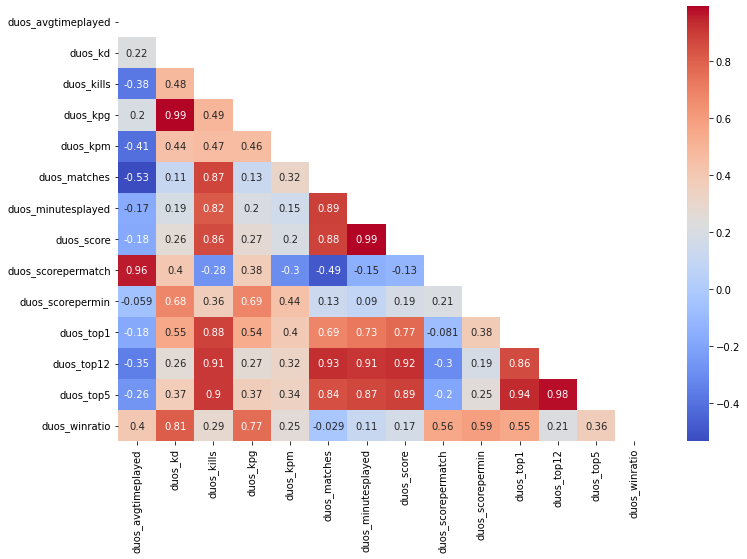

In [29]:
# Correlation heatmap for the duos statistics
corr_heatmap(player_corr.iloc[:14, :14])

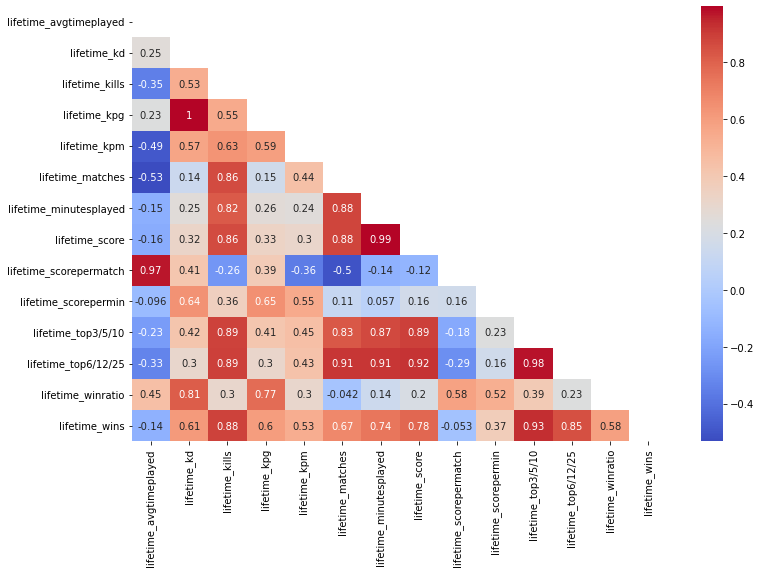

In [30]:
# Correlation heatmap for the lifetime statistics
corr_heatmap(player_corr.iloc[14:28, 14:28])

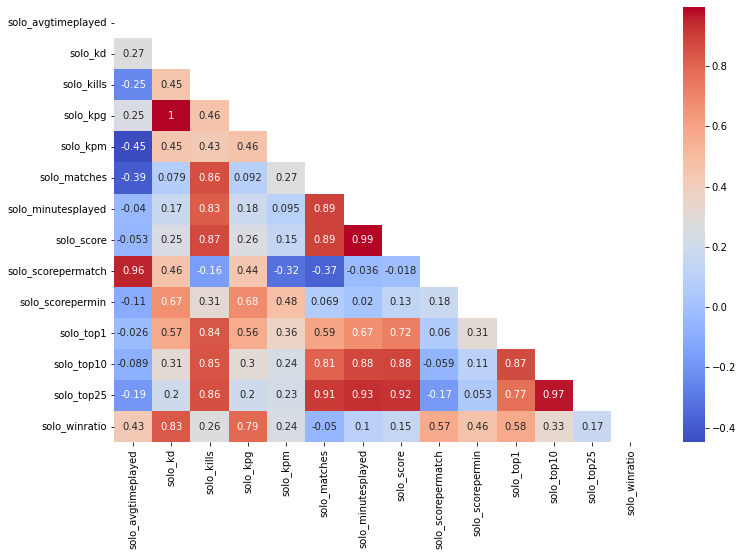

In [31]:
# Correlation heatmap for the solo statistics
corr_heatmap(player_corr.iloc[28:42, 28:42])

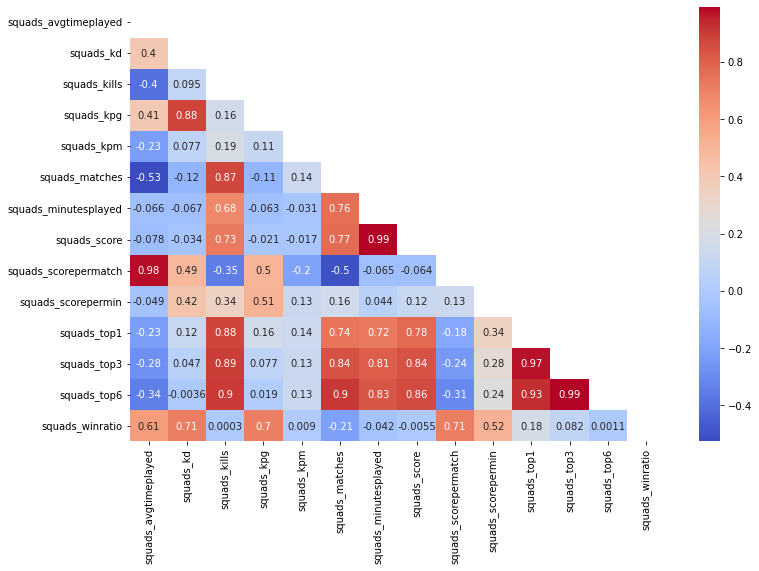

In [32]:
# Correlation heatmap for the squads statistics
corr_heatmap(player_corr.iloc[42:56, 42:56])

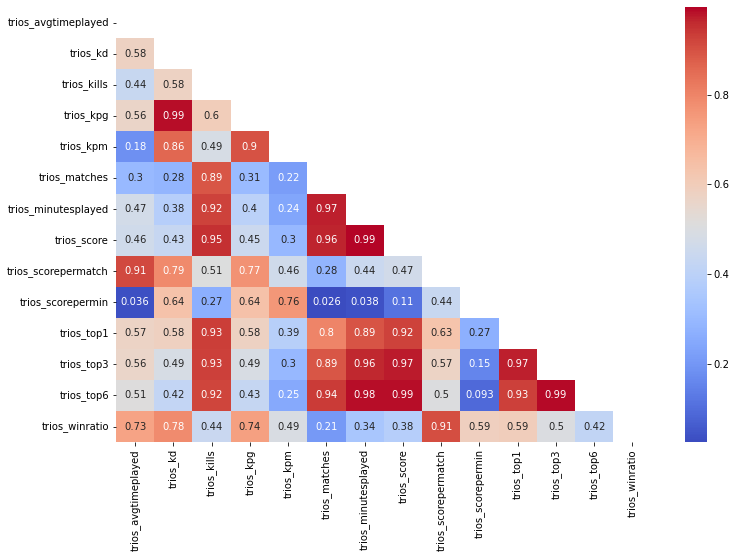

In [33]:
# Correlation heatmap for the trios statistics
corr_heatmap(player_corr.iloc[56:, 56:])

From the above, we can see that the following features are heavily correlated with each other:
- `kpg` (Kills per game) with `kd` (Kill/Death ratio) and `kpm` (Kills per minute)
- `scorepermatch` with `winratio` and `avgtimeplayed`
- `minutesplayed` with `matches` and `kills`
- The top variables and score

As these features are linked to each other in many other intricate ways, we will be considering dropping them for multicollinearity if necessary later. It should be noted that the more `matches` played, the higher the `score`, the `kills`, `minutesplayed` will be by natural progression.   

#### 6.2 Correlation between variables with regards to the target

In [34]:
# Correlation of predictor variables with `target`
combined_corr = combined_df.corr()['target']
combined_corr.abs().sort_values(ascending = False) # Using absolute values since positive or negative matters not yet

target                    1.000000
eliminations              0.357989
points                    0.356403
timealive                 0.108053
trios_kpg                 0.064901
trios_kd                  0.062878
trios_scorepermatch       0.058968
trios_winratio            0.057379
lifetime_kpg              0.056725
lifetime_kd               0.056065
solo_kd                   0.055829
solo_kpg                  0.055608
trios_avgtimeplayed       0.053462
duos_kpg                  0.052965
duos_kd                   0.052014
solo_winratio             0.050617
trios_kpm                 0.048173
trios_top1                0.047702
trios_kills               0.046373
solo_top1                 0.045832
lifetime_kills            0.045128
solo_kills                0.044765
lifetime_wins             0.044584
lifetime_winratio         0.044047
duos_winratio             0.043906
trios_top3                0.043861
trios_top6                0.039344
solo_scorepermin          0.038928
lifetime_score      

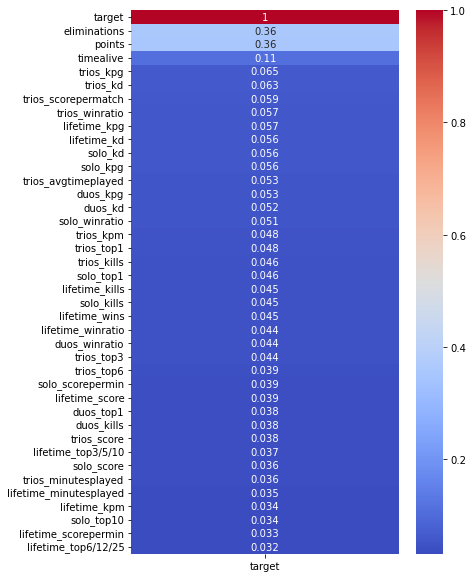

In [35]:
# Heatmap of correlation for the top 40 features
plt.figure(figsize = [6, 10])
sns.heatmap(combined_corr.abs().sort_values(ascending = False).to_frame().head(40), 
            annot=True, cmap = 'coolwarm');

Looking at the above, we can see that the three match statistics `eliminations`, `points` and `timealive` are more closely correlated to the target variable than the player statistics. In fact, for the predictor variables, it would seem that there is no clear correlation to the target variable, and this might be an issue as this will likely impact the effectiveness of the model.

In [36]:
# function for enhanced box plot of target against variable
def plot_target(variable):
    boxplot = sns.boxenplot(x = "target", y = variable, data = combined_df)
    boxplot.axes.set_title(f"Distribution of {variable}", fontsize = 12)
    boxplot.set_xlabel("Target")
    boxplot.set_ylabel(f"{variable.capitalize()}")

In [37]:
# function for plotting individual sections
def plot_quad(suffix):
    fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2, figsize = (12, 8))
    
    prefix = ['solo', 'duos', 'squads', 'trios']
    col_name = [i + '_' + suffix for i in prefix]
    
    sns.boxenplot(ax = ax0, x = "target", y = col_name[0], data = combined_df)
    ax0.set_title('Histogram of ' + col_name[0])
    ax0.set_xlabel("Target")
    ax0.set_ylabel(f"{col_name[0].capitalize()}")
    
    sns.boxenplot(ax = ax1, x = "target", y = col_name[1], data = combined_df)
    ax1.set_title('Histogram of ' + col_name[1])
    ax1.set_xlabel("Target")
    ax1.set_ylabel(f"{col_name[1].capitalize()}")

    sns.boxenplot(ax = ax2, x = "target", y = col_name[2], data = combined_df)
    ax2.set_title('Histogram of ' + col_name[2])
    ax2.set_xlabel("Target")
    ax2.set_ylabel(f"{col_name[2].capitalize()}")
    
    sns.boxenplot(ax = ax3, x = "target", y = col_name[3], data = combined_df)
    ax3.set_title('Histogram of ' + col_name[3])
    ax3.set_xlabel("Target")
    ax3.set_ylabel(f"{col_name[3].capitalize()}")
             
    fig.tight_layout()

**6.2.1 Box Plots for Match Statistics**

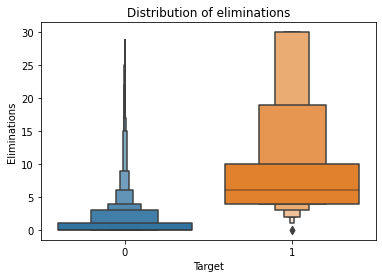

In [38]:
# Boxplot of eliminations
plot_target('eliminations')

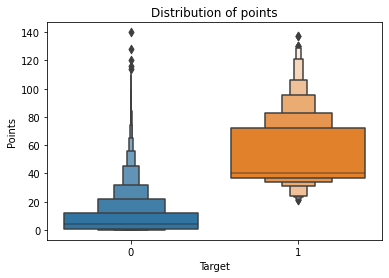

In [39]:
# Boxplot of points
plot_target('points')

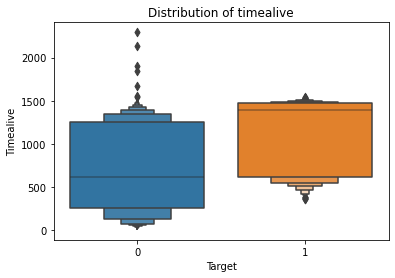

In [40]:
# Boxplot of timealive
plot_target('timealive')

From the box plots above, it is quite clear to see that for the target class, it is more likely for the winner to have higher values in `eliminations`, `points` and `timealive`.

**6.2.2 Box Plots for Player Statistics**   
Let's take a look at the plots for the player statistics that have the next highest correlation after the match statistics.

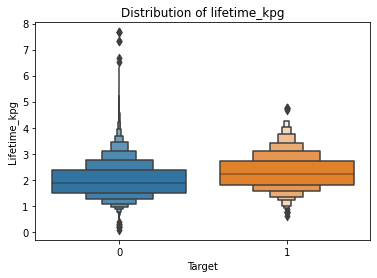

In [41]:
# Box plots of lifetime_kpg
plot_target('lifetime_kpg')

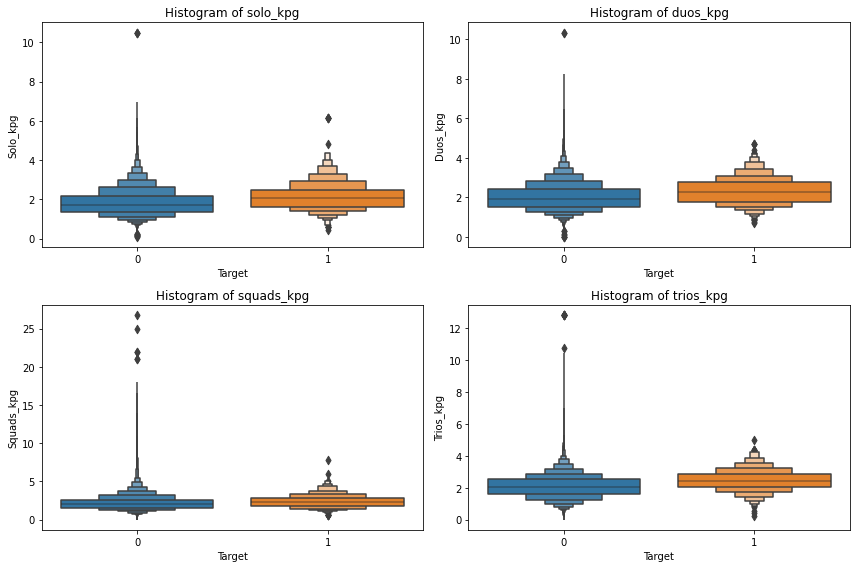

In [42]:
# Box plots of kpg or kills per game
plot_quad('kpg')

From the box plots above, we can see that there is a slight correlation where a higher `kpg` would be related to being the winner, but it should be noted that there are several outliers for the non-target class. 

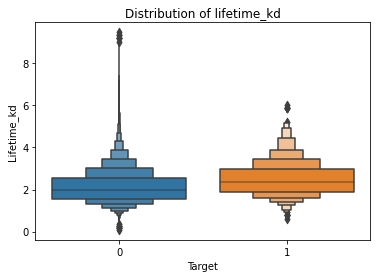

In [43]:
# Box plots of lifetime_kd
plot_target('lifetime_kd')

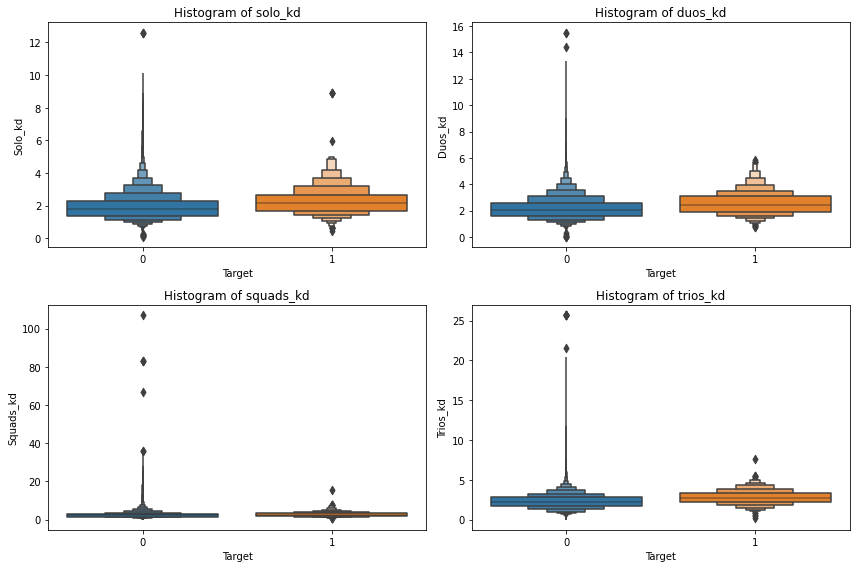

In [44]:
# Box plots of kd or kills-death ratio
plot_quad('kd')

From the box plots above, in a similar fashion to the `kpg` plots, we can also see that there is a slight correlation where a higher `kd` would be related to being the winner, but it should be noted that there are several outliers for the non-target class. 

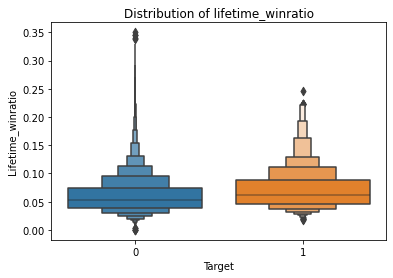

In [45]:
# Box plots of lifetime_winratio
plot_target('lifetime_winratio')

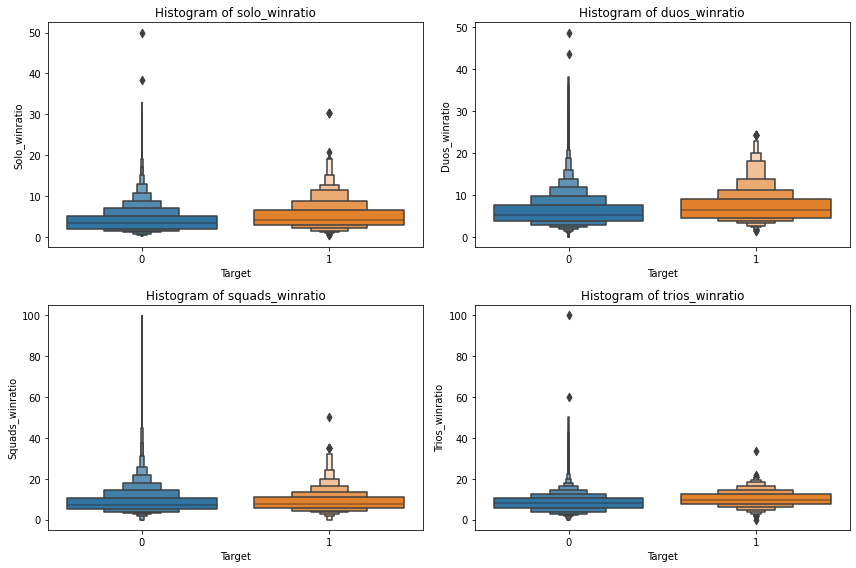

In [46]:
# Box plots of win ratio
plot_quad('winratio')

From the box plots above, in a similar fashion to the `kpg` and `kd` plots, we can also see that there is a slight correlation where a higher `winratio` would be related to being the winner, but it should be noted that there are several outliers for the non-target class. 

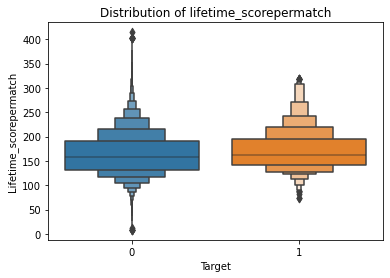

In [47]:
# Box plots of lifetime_scorepermatch
plot_target('lifetime_scorepermatch')

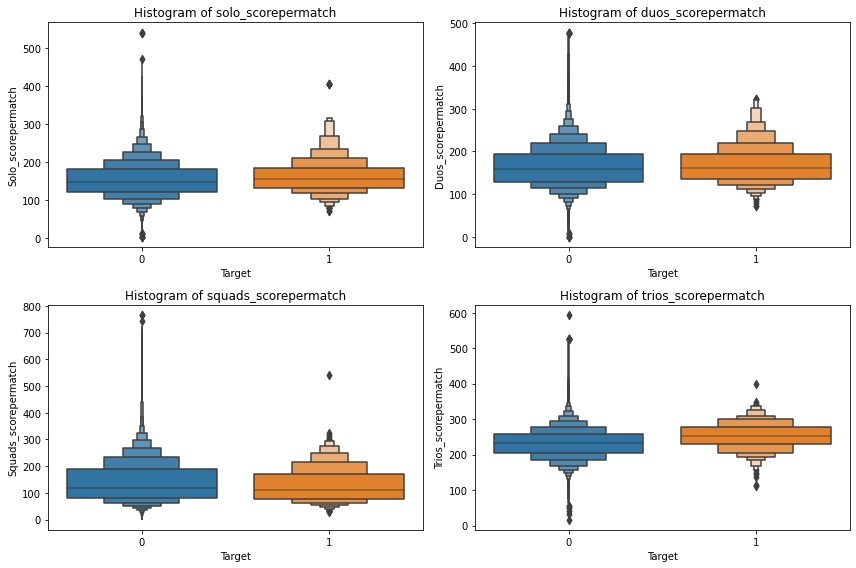

In [48]:
# Box plots of scorepermatch
plot_quad('scorepermatch')

From the box plots above, other than `trios_scorepermatch`, it surprisingly seemed that there is no correlation to the target class for `scorepermatch`. However, considering how the `score` is calculated based on the number of `eliminations` and `timealive` for each match, this result may not be that unexpected as this does not necessarily translate to the player being the winner even if he gets the highest score in the match. 

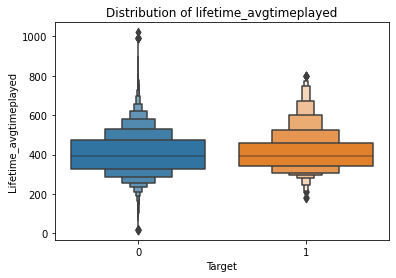

In [49]:
# Box plots of lifetime_avgtimeplayed
plot_target('lifetime_avgtimeplayed')

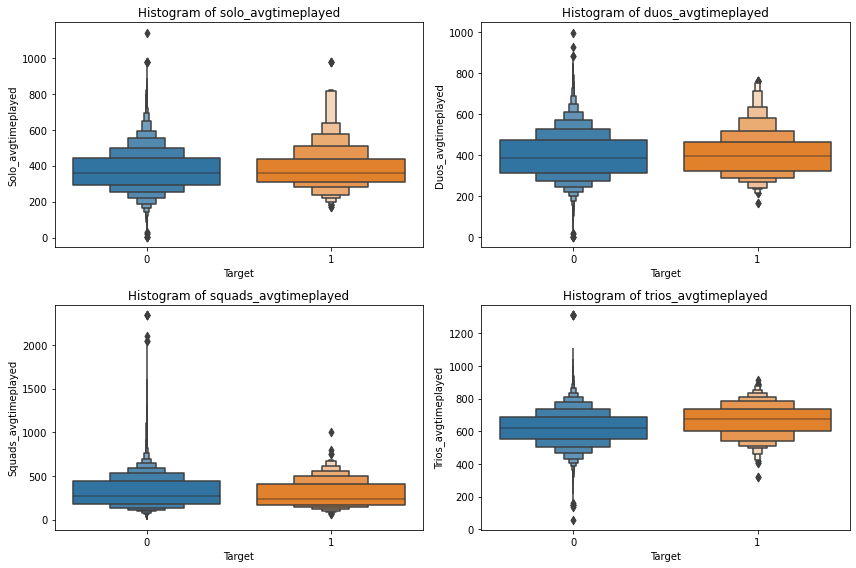

In [50]:
# Box plots of avgtimeplayed
plot_quad('avgtimeplayed')

From the box plots above, similar to `scorepermatch`, other than `trios_avgtimeplayed`, it surprisingly seemed that there is no correlation to the target class for `avgtimeplayed`. However, considering how the `avgtimeplayed` is calculated based on the `timealive` for each match, this result may not be that unexpected as this does not necessarily translate to the player being the winner even if he has the highest `timealive` in the match. 

<a id="visuals"></a>
### 7. Visualizations for predictor variables

At this point in time, let's take a look at the various predictor variables as well as those that are likely to indicate the performance of a player.

#### 7.1 Functions for Visualizations

In [51]:
# function for plotting lifetime statistics
def visual(col_name, num_bin = 10):
    fig, ax = plt.subplots()
    
    plt.title('Histogram of ' + col_name)
    plt.xlabel(col_name)
    plt.ylabel('log Count')
    ax.set_yscale('log')
    combined_df.hist(column = col_name, ax = ax, bins = num_bin, grid=False)

In [52]:
# function for plotting individual sections
def visual_quad(suffix, num_bins = 10):
    fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2, figsize = (12, 8))
    
    prefix = ['solo', 'duos', 'squads', 'trios']
    col_name = [i + '_' + suffix for i in prefix]
    
    ax0.set_title('Histogram of ' + col_name[0])
    ax0.set_xlabel(col_name[0])
    ax0.set_ylabel('log Count')
    ax0.set_yscale('log')
    ax0.hist(col_name[0], data = combined_df, bins = num_bins)

    ax1.set_title('Histogram of ' + col_name[1])
    ax1.set_xlabel(col_name[1])
    ax1.set_ylabel('log Count')
    ax1.set_yscale('log')
    ax1.hist(col_name[1], data = combined_df, bins = num_bins)

    ax2.set_title('Histogram of ' + col_name[2])
    ax2.set_xlabel(col_name[2])
    ax2.set_ylabel('log Count')
    ax2.set_yscale('log')
    ax2.hist(x = col_name[2], data = combined_df, bins = num_bins)
    
    ax3.set_title('Histogram of ' + col_name[3])
    ax3.set_xlabel(col_name[3])
    ax3.set_ylabel('log Count')
    ax3.set_yscale('log')
    ax3.hist(col_name[3], data = combined_df, bins = num_bins)
             
    fig.tight_layout()

#### 7.2 Visuals for Scores

The `score` and the `scorepermatch` are references to the total and overall performance of the player. 

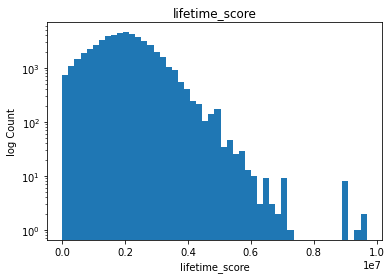

In [53]:
visual('lifetime_score', 50)

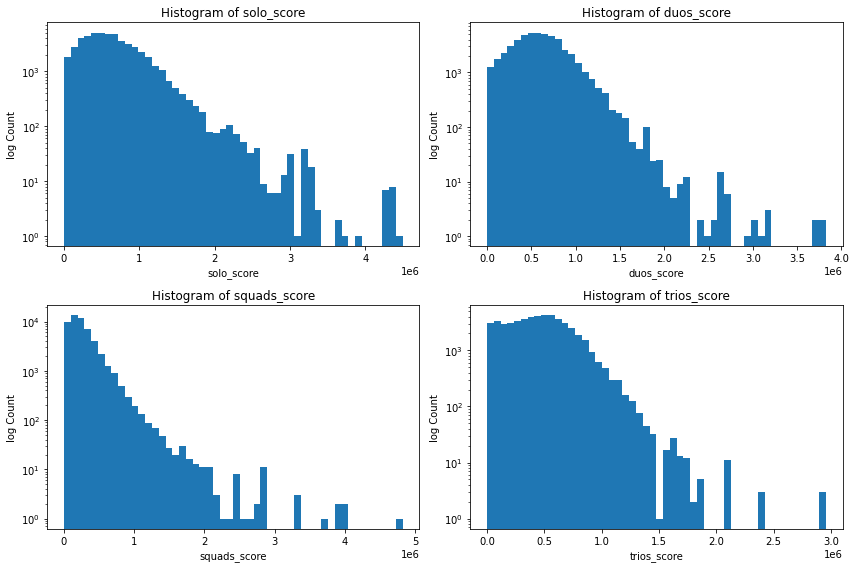

In [54]:
visual_quad('score', 50)

From the plots above, the histograms for `score` variables, which are cumulative, are right skewed. This is to be expected since the scores are cumulative, and thus the more someone plays, the more higher the score, but since only a smaller proprortion of players can invest in that much more play time, the skew occurs.

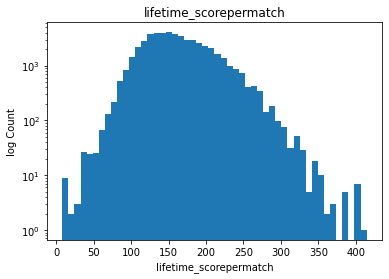

In [55]:
visual('lifetime_scorepermatch', 50)

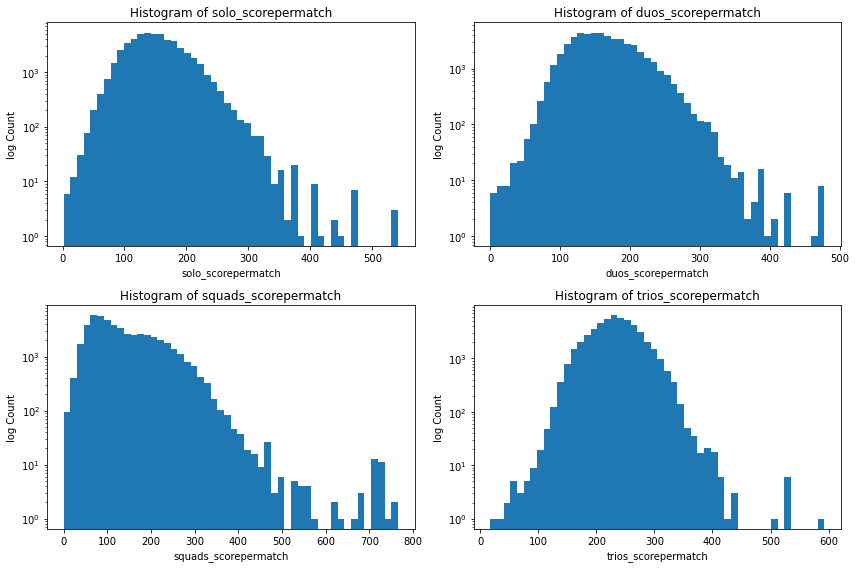

In [56]:
visual_quad('scorepermatch', 50)

Compared to the prior histograms for `score`, the histograms for `scorepermatch` start to approach a normal distribution with the mean around 150 for all except `trios` with a higher mean of around 230 and `squads` with a lower mean of around 140. This can be related to the fact that these match modes have more players in each team, thus affecting how the scoring is calculated. 

#### 7.3 Visuals for Kills/Deaths Ratio

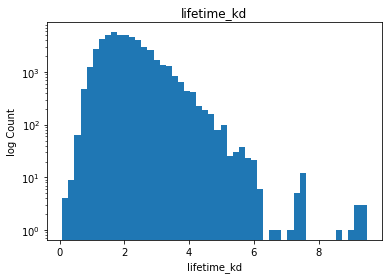

In [57]:
visual('lifetime_kd', 50)

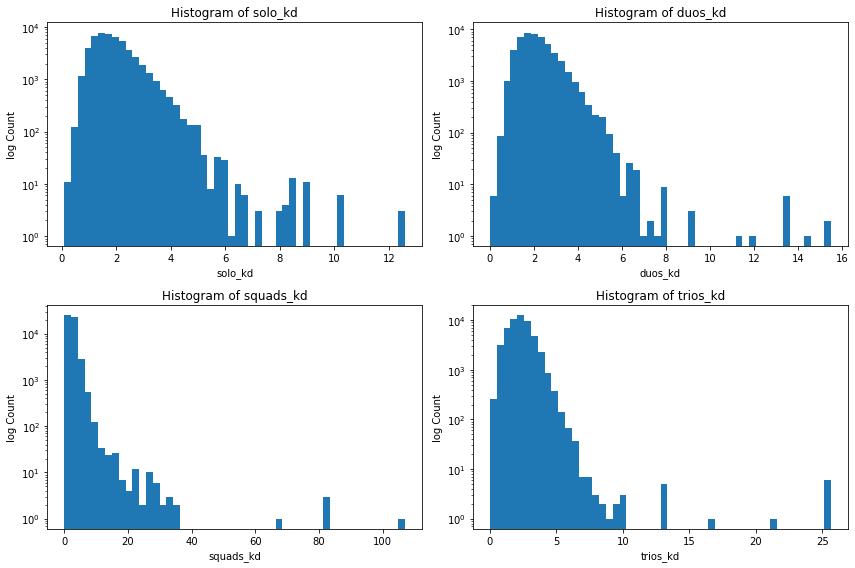

In [58]:
visual_quad('kd', 50)

Like the histograms for the `score` variables, the above histograms are also right-skewed. However, this is due to the fact that the better-skilled players which will have a higher `kill to death ratio` is of a smaller number compared to the numerous less-skilled players with a lower `kill to death ratio`.

#### 7.4 Visuals for Win Ratio

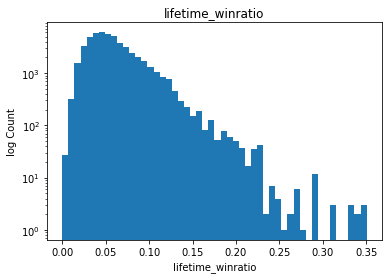

In [59]:
visual('lifetime_winratio', 50)

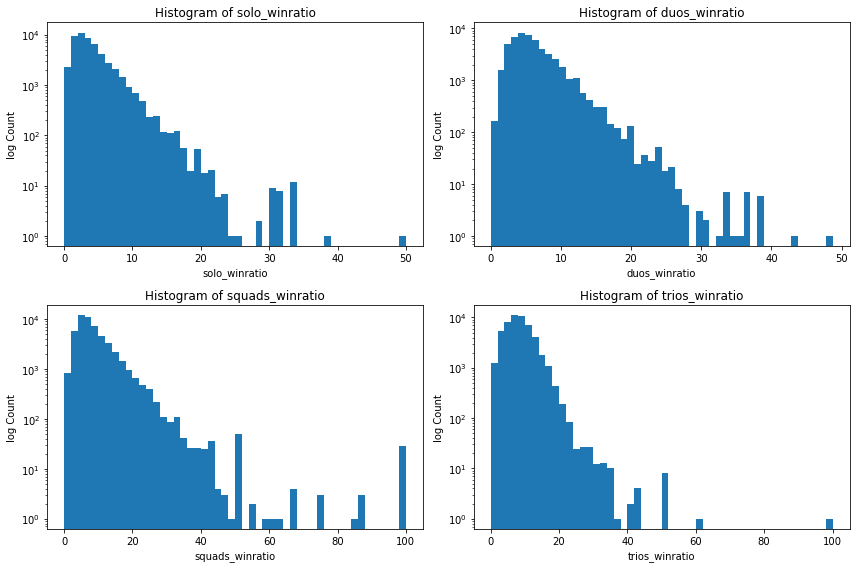

In [60]:
visual_quad('winratio', 50)

Like the histograms for the `kill to death ratio` variables, the above histograms for `win ratio` are also right-skewed. In fact, the explanation is also similar as this is due to the fact that the better-skilled players which will have a higher `win ratio` is of a smaller number compared to the numerous less-skilled players with a lower `win ratio`.

#### 7.5 Visuals for Minutes Played

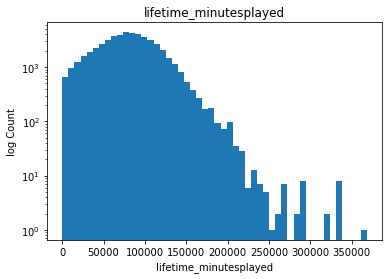

In [61]:
visual('lifetime_minutesplayed', 50)

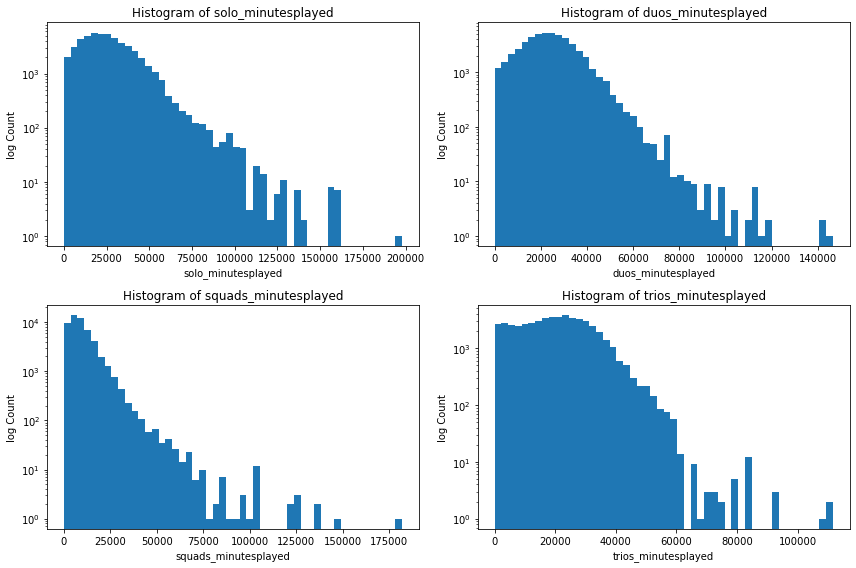

In [62]:
visual_quad('minutesplayed', 50)

From the plots above, the histograms for `minutesplayed` variables, which are cumulative, are right skewed. This is to be expected since the scores are cumulative, and thus the more someone plays, the higher the value of `minutesplayed`, but since only a smaller proprortion of players can invest in that much more play time, the skew occurs.

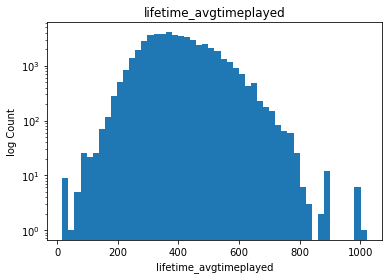

In [63]:
visual('lifetime_avgtimeplayed', 50)

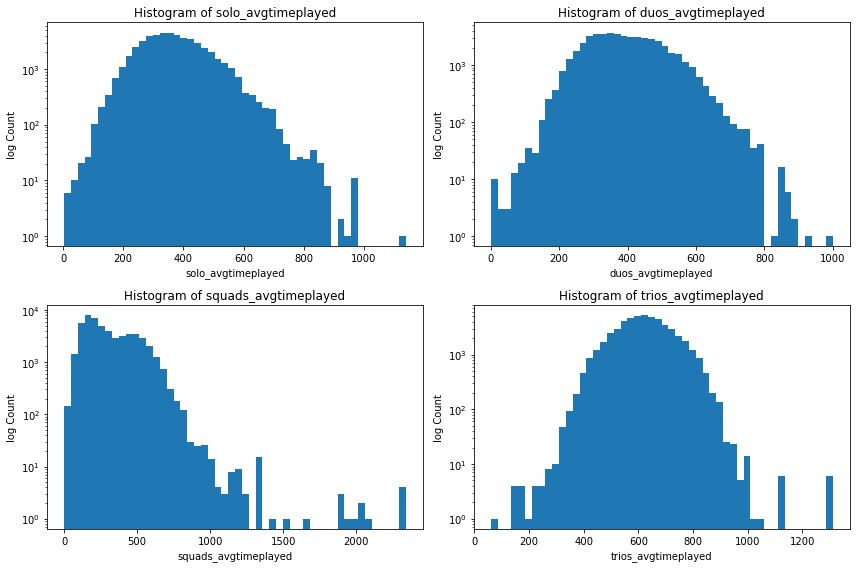

In [64]:
visual_quad('avgtimeplayed', 50)

Compared to the prior histograms for `minutesplayed`, the histograms for `avgtimeplayed` start to approach a normal distribution, though the `squads` mode showed less. This can be related to the fact that these match modes have more players in each team, thus affecting the gameplay, resulting in a drastic difference in match time for the players.

### 8. Progress thus far

In [65]:
# Saving the combined dataframe to csv for modelling
combined_df.to_csv("../datasets/combined_df.csv", index = False)

In [Part 2 Data Cleaning and EDA](./2.data_cleaning_and_eda.ipynb), data cleaning is performed on the two datasets for match statistics and player statistics. Feature engineering is performed on the player statistics dataset to generate new columns that may be of use. Then the two datasets are merged into a single dataframe to be used for modelling. 

Exploratory Data Analysis is also conducted, and various visuals of the correlations as well as the distributions of the variables can be seen above.

We will continue next in: [Part 3-1 Modelling](./3-1.modelling.ipynb)